# Proyek Analisis Data: [E-commerce-public-dataset]
- **Nama:** Ariq Luthfi Rifqi
- **Email:** ttzluthfi@gmail.com
- **ID Dicoding:** ariqluthfi

Deskripsi file dataset yang digunakan dalam analisis ini adalah sebagai berikut,

*`orders_dataset :`*

File ini berisi informasi tentang pesanan, seperti ID pesanan, status pesanan, waktu pembelian, dan waktu pengiriman pesanan.

`*order_items_dataset :*`

File ini berisi informasi terperinci tentang setiap item yang dibeli dalam pesanan

*`order_payments_dataset`* :

File ini berisi informasi terperinci tentang jenis pembayaran yang digunakan dari setiap item yang dibeli dalam pesanan

*`order_reviews_dataset :`*

File ini berisi informasi terperinci tentang review dari setiap item yang dibeli dalam pesanan

*`products_dataset`* :

File ini berisi informasi tentang produk, termasuk ID produk dan nama produk.

*`product_category_dataset`* :

File ini berisi informasi tentang kategori produk, termasuk ID produk dan kategori produk.

*`sellers_dataset`* :

File ini berisi informasi tentang penjual, seperti ID penjual, nama penjual, dan lokasi penjual (kota dan negara bagian).

`*`customers_dataset`*` :

File ini berisi informasi tentang pelanggan, seperti ID pelanggan, nama pelanggan, dan lokasi pelanggan (kota dan negara bagian).

geolocation_dataset :

File ini menyediakan informasi geografis tentang kota dan negara bagian di Brazil. Ini membantu dalam analisis berdasarkan lokasi geografis.

## Menentukan Pertanyaan Bisnis


- pertanyaan : berapa jumlah product 5 tertinggi dan terendah ?
- pertanyaan : Dimana geolocation tempat yang 5 tertinggi dan terendah Pendapatan uang?
- pertanyaan : jenis pembayaran yang sering digunakan pelanggan ?
- pertanyaan : Kapan waktu yang paling banyak pelanggan yang melakukan transaksi ?


## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno
import matplotlib.image as mpimg
import plotly.graph_objects as go
import plotly.express as px
# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

## Data Wrangling

### Gathering Data

- customer dataset
- order dataset
- product dataset
- sales dataset
- geolocation dataset

# Customer dataset


In [3]:
df_customer = pd.read_csv('dataset/customers_dataset.csv', index_col=0)
df_customer.head()

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
customer_id,,,,
06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Assesing Data

In [136]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
 5   status_customer           99441 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


### Cleaning Data

**cleaning data dan mising data**

In [5]:
df_customer.isna().sum()/len(df_customer.index)*100

customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

In [6]:
df_customer.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [7]:
df_customer.shape

(99441, 4)

Kode ini membantu dalam melakukan exploratory data analysis (EDA) dengan memberikan ringkasan yang ringkas tentang struktur data, tipe data, jumlah nilai hilang, jumlah nilai unik, serta beberapa sampel dari nilai unik. Ini sangat bermanfaat untuk memahami kualitas data sebelum melanjutkan ke analisis lebih lanjut atau pemodelan.

Membuat DataFrame baru bernama df_customerDesc dengan kolom:

```
dataFeatures: Nama kolom dari df_customer.
dataType: Tipe data dari setiap kolom.
null: Jumlah nilai hilang di setiap kolom.
nullPct: Persentase nilai hilang di setiap kolom.
unique: Jumlah nilai unik di setiap kolom.
uniqueSample: Dua sampel acak dari nilai unik di setiap kolom.
```



In [8]:
listItem = []
for col in df_customer.columns :
    listItem.append([col, df_customer[col].dtype, df_customer[col].isna().sum(), round((df_customer[col].isna().sum()/len(df_customer[col])) * 100,2),
                    df_customer[col].nunique(), list(df_customer[col].drop_duplicates().sample(2).values)]);

df_customerDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_customerDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,customer_unique_id,object,0,0.0,96096,"[8f48a3e77f9cc4c4116cdc406c30625e, 398a0d73418..."
1,customer_zip_code_prefix,int64,0,0.0,14994,"[50060, 9913]"
2,customer_city,object,0,0.0,4119,"[tabocas do brejo velho, criciuma]"
3,customer_state,object,0,0.0,27,"[RR, PR]"


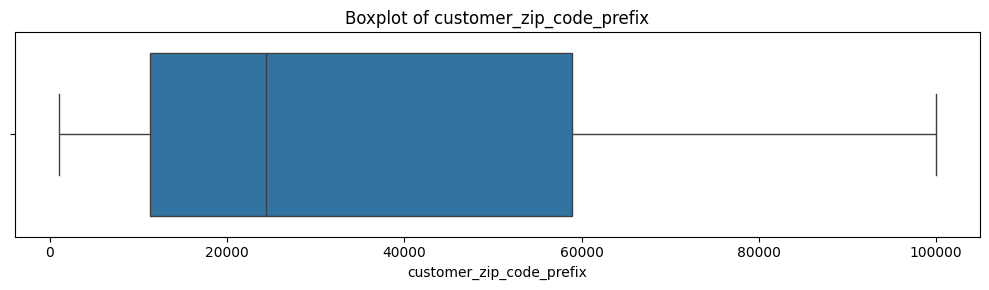

In [9]:

numerical_customer_columns = df_customer.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(nrows=len(numerical_customer_columns), figsize=(10, 3*len(numerical_customer_columns)))

if len(numerical_customer_columns) == 1:
    axes = [axes]

for i, feature in enumerate(numerical_customer_columns):
    sns.boxplot(x=df_customer[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [10]:

numeric_columns = df_customer.select_dtypes(include=[np.number]).columns


outlier_percentages = {}

for column in numeric_columns:
    Q1 = df_customer[column].quantile(0.25)
    Q3 = df_customer[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

   
    outliers = df_customer[(df_customer[column] < lower_bound) | (df_customer[column] > upper_bound)]
    num_outliers = outliers.shape[0]


    total_data = df_customer.shape[0]
    percentage_outliers = (num_outliers / total_data) * 100


    outlier_percentages[column] = percentage_outliers


outlier_df = pd.DataFrame.from_dict(outlier_percentages, orient='index', columns=['Outlier Percentage'])


print(outlier_df)

                          Outlier Percentage
customer_zip_code_prefix                 0.0


<Axes: >

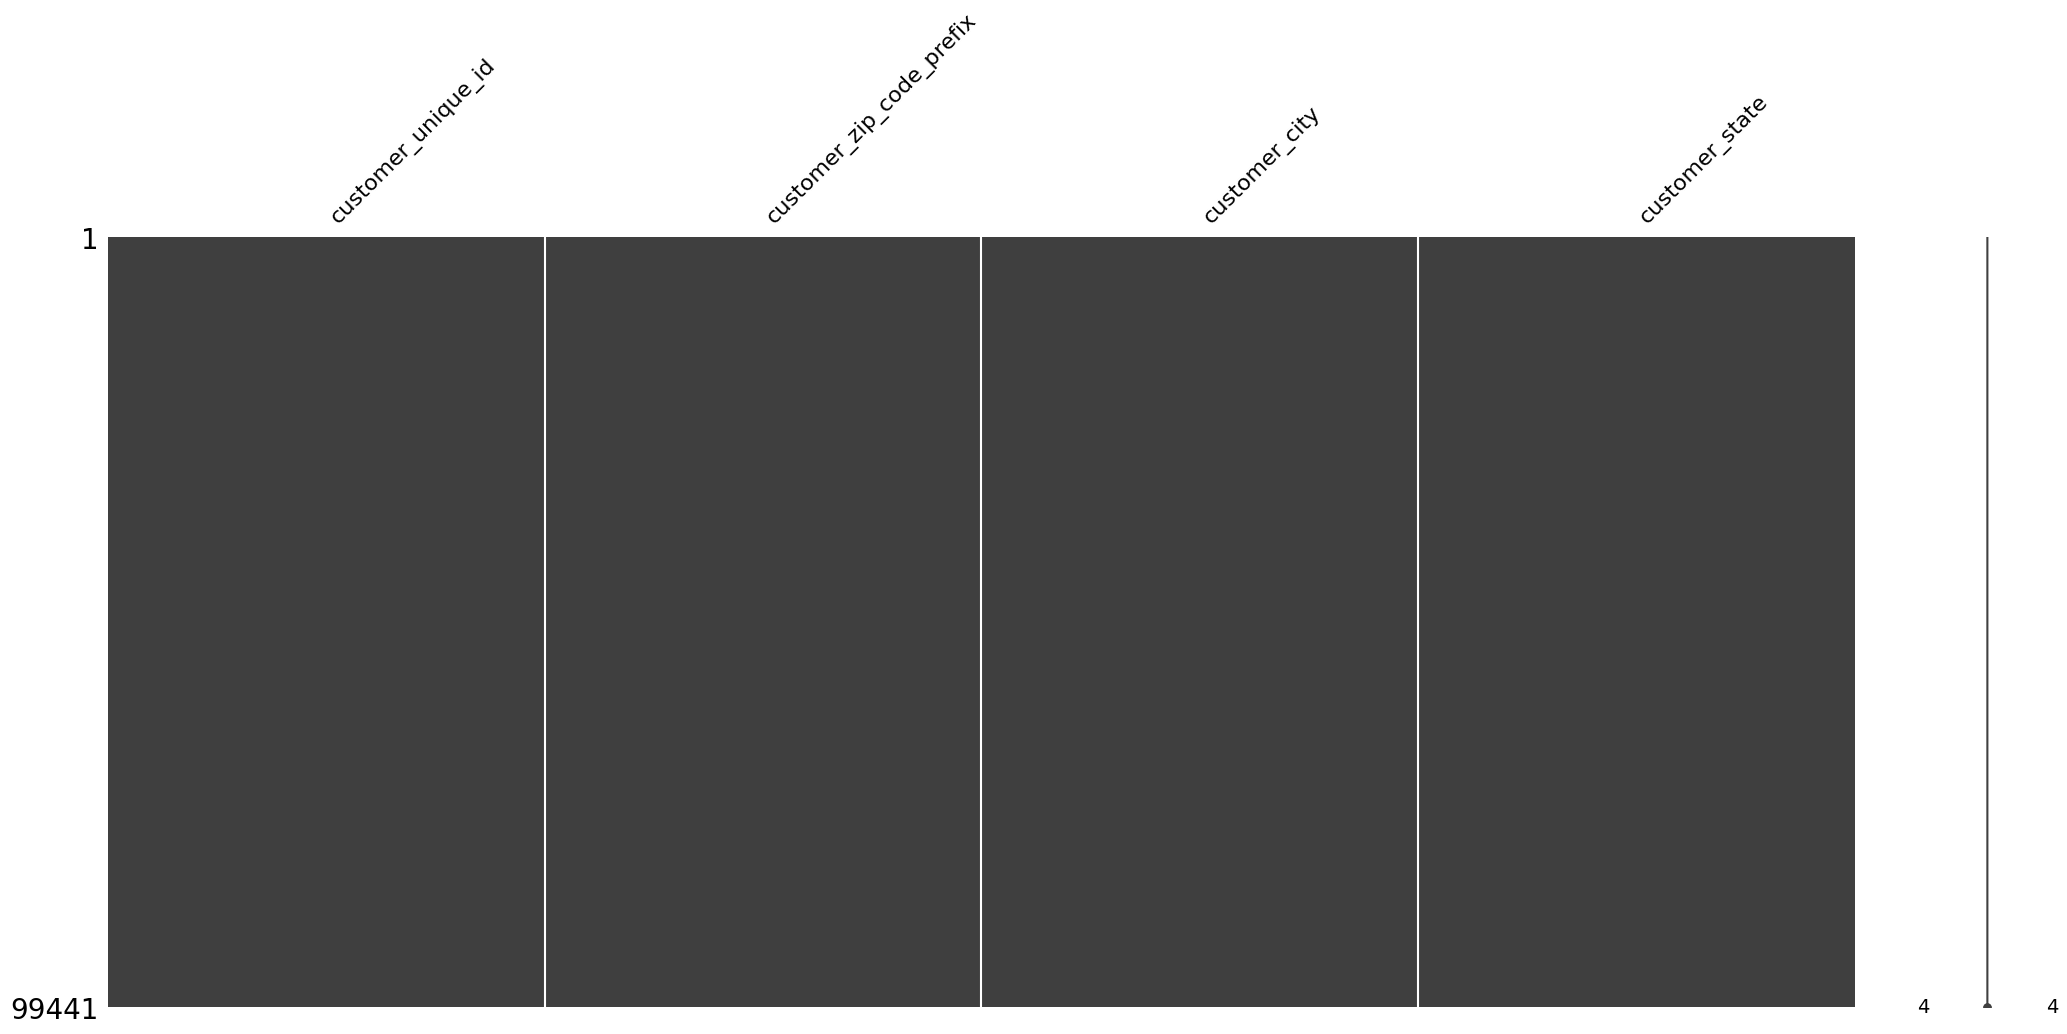

In [11]:
missingno.matrix(df_customer)

memanggil index customer agar muuncul di column

In [12]:
df_customer.index

Index(['06b8999e2fba1a1fbc88172c00ba8bc7', '18955e83d337fd6b2def6b18a428ac77',
       '4e7b3e00288586ebd08712fdd0374a03', 'b2b6027bc5c5109e529d4dc6358b12c3',
       '4f2d8ab171c80ec8364f7c12e35b23ad', '879864dab9bc3047522c92c82e1212b8',
       'fd826e7cf63160e536e0908c76c3f441', '5e274e7a0c3809e14aba7ad5aae0d407',
       '5adf08e34b2e993982a47070956c5c65', '4b7139f34592b3a31687243a302fa75b',
       ...
       'be842c57a8c5a62e9585dd72f22b6338', 'f255d679c7c86c24ef4861320d5b7675',
       '14308d2303a3e2bdf4939b86c46d2679', 'f5a0b560f9e9427792a88bec97710212',
       '7fe2e80252a9ea476f950ae8f85b0f8f', '17ddf5dd5d51696bb3d7c6291687be6f',
       'e7b71a9017aa05c9a7fd292d714858e8', '5e28dfe12db7fb50a4b2f691faecea5e',
       '56b18e2166679b8a959d72dd06da27f9', '274fa6071e5e17fe303b9748641082c8'],
      dtype='object', name='customer_id', length=99441)

In [13]:
df_customer.reset_index(inplace=True)

# Mengecek ulang data
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


## Analysis Customer

In [14]:
df_customer.groupby(by="customer_state").agg({
    "customer_id": "nunique",
    "customer_city" : "unique"
}).sort_values(by="customer_id",ascending=False).reset_index()

,customer_state,customer_id,customer_city
0,SP,41746,"[franca, sao bernardo do campo, sao paulo, mog..."
1,RJ,12852,"[rio de janeiro, resende, parati, sao goncalo,..."
2,MG,11635,"[timoteo, belo horizonte, montes claros, santa..."
3,RS,5466,"[caxias do sul, novo hamburgo, pelotas, porto ..."
4,PR,5045,"[curitiba, sao jose dos pinhais, cascavel, ara..."
5,SC,3637,"[jaragua do sul, florianopolis, sao jose, timb..."
6,BA,3380,"[camacari, cruz das almas, feira de santana, s..."
7,DF,2140,"[brasilia, taguatinga, sobradinho, guara, ceil..."
8,ES,2033,"[cachoeiro de itapemirim, ibatiba, vila velha,..."
9,GO,2020,"[aparecida de goiania, goiania, trindade, bom ..."


pada sebelumnya terdapat state SP memiliki jumlah customer terbanyak sekitar **41746**

In [15]:
df_customer.groupby(by="customer_city").agg({
    "customer_id": "nunique"
}).sort_values(by="customer_id",ascending=False).reset_index().nlargest(15, "customer_id")

,customer_city,customer_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


pada sebelumnya terdapat customer city sao paulo memiliki jumlah customer terbanyak sekitar **15540**

In [16]:
df_customer.groupby(by="customer_city").agg({
    "customer_id": "nunique"
}).sort_values(by="customer_id",ascending=False).reset_index().nsmallest(15, "customer_id")

,customer_city,customer_id
2975,abdon batista,1
2976,acajutiba,1
2977,adhemar de barros,1
2978,adrianopolis,1
2979,adustina,1
2980,acari,1
2981,acucena,1
2982,vitorino,1
2983,miraguai,1
2984,miradouro,1


Dapat dilihat bahwa kota acucena hingga cotipora memiliki jumlah customer paling sedikit yaitu **1**

# Order Dataset

### orders

In [17]:
df_orders = pd.read_csv('dataset/orders_dataset.csv', index_col=0)
df_orders.head()

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_id,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Assesing Data

In [18]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, e481f51cbdc54678b7cc49136f2d6af7 to 66dea50a8b16d9b4dee7af250b4be1a5
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    99441 non-null  object
 1   order_status                   99441 non-null  object
 2   order_purchase_timestamp       99441 non-null  object
 3   order_approved_at              99281 non-null  object
 4   order_delivered_carrier_date   97658 non-null  object
 5   order_delivered_customer_date  96476 non-null  object
 6   order_estimated_delivery_date  99441 non-null  object
dtypes: object(7)
memory usage: 6.1+ MB


In [19]:
df_orders.isna().sum()/len(df_orders.index)*100

customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

In [20]:
df_orders.describe()

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99281,97658,96476,99441
unique,99441,8,98875,90733,81018,95664,459
top,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,96478,3,9,47,3,522


In [21]:
df_orders.shape

(99441, 7)

Kode ini membantu dalam melakukan exploratory data analysis (EDA) dengan memberikan ringkasan yang ringkas tentang struktur data, tipe data, jumlah nilai hilang, jumlah nilai unik, serta beberapa sampel dari nilai unik. Ini sangat bermanfaat untuk memahami kualitas data sebelum melanjutkan ke analisis lebih lanjut atau pemodelan.

Membuat DataFrame baru bernama df_ordersDesc dengan kolom:

```
dataFeatures: Nama kolom dari df_orders.
dataType: Tipe data dari setiap kolom.
null: Jumlah nilai hilang di setiap kolom.
nullPct: Persentase nilai hilang di setiap kolom.
unique: Jumlah nilai unik di setiap kolom.
uniqueSample: Dua sampel acak dari nilai unik di setiap kolom.
```



In [22]:
listItem = []
for col in df_orders.columns :
    listItem.append([col, df_orders[col].dtype, df_orders[col].isna().sum(), round((df_orders[col].isna().sum()/len(df_orders[col])) * 100,2),
                    df_orders[col].nunique(), list(df_orders[col].drop_duplicates().sample(2).values)]);

df_ordersDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_ordersDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,customer_id,object,0,0.00,99441,"[3fe89a08445d29487b8766af9207a44e, 89fe9585e07..."
1,order_status,object,0,0.00,8,"[shipped, approved]"
2,order_purchase_timestamp,object,0,0.00,98875,"[2018-01-17 16:21:57, 2018-02-25 11:48:38]"
3,order_approved_at,object,160,0.16,90733,"[2018-06-19 16:25:23, 2017-04-22 09:45:13]"
4,order_delivered_carrier_date,object,1783,1.79,81018,"[2017-09-14 17:39:04, 2018-03-27 00:38:26]"
5,order_delivered_customer_date,object,2965,2.98,95664,"[2018-05-23 01:28:18, 2018-03-08 20:51:28]"
6,order_estimated_delivery_date,object,0,0.00,459,"[2017-03-15 00:00:00, 2018-10-15 00:00:00]"


<Axes: >

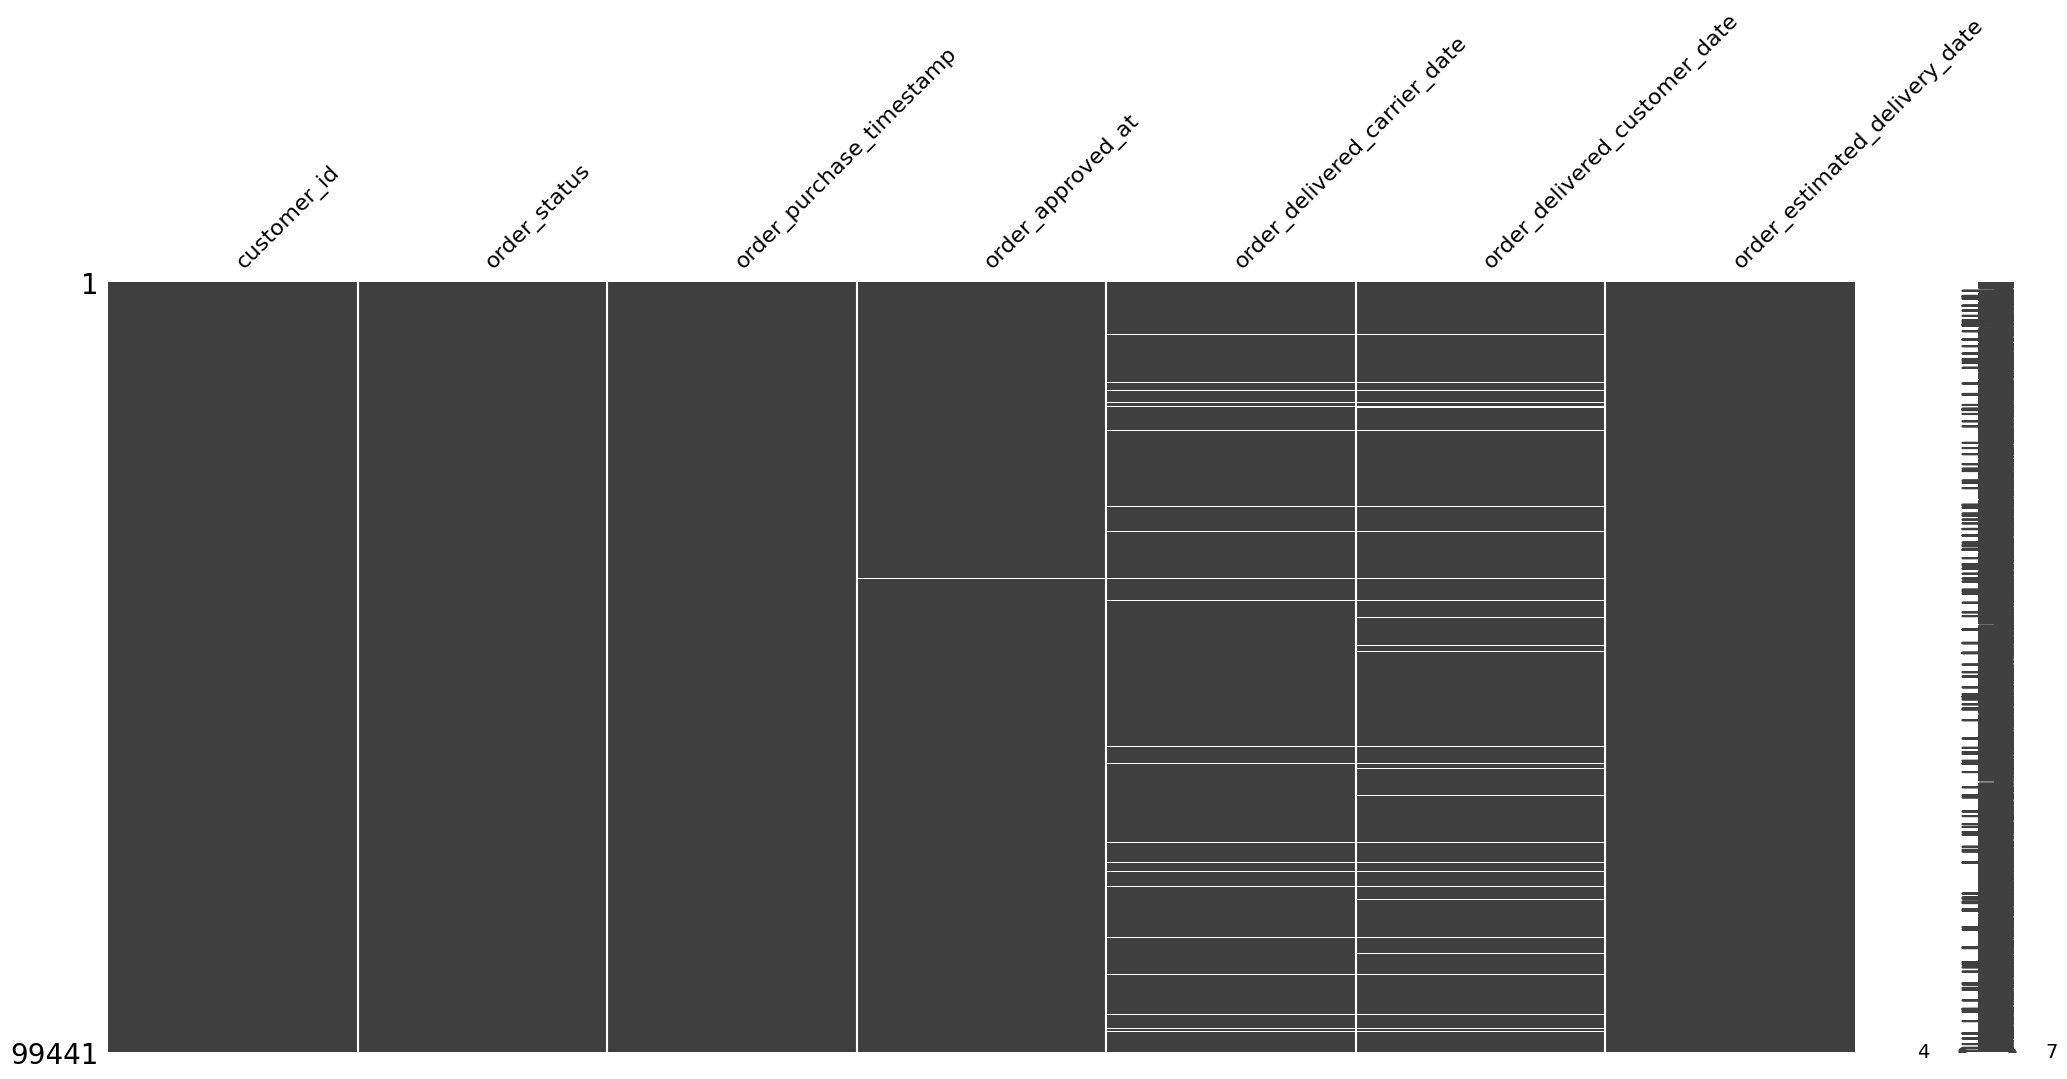

In [23]:
missingno.matrix(df_orders)

In [24]:

df_orders['order_approved_at'].fillna(df_orders['order_purchase_timestamp'], inplace=True)
df_orders['order_delivered_carrier_date'].fillna(df_orders['order_purchase_timestamp'], inplace=True)
df_orders['order_delivered_customer_date'].fillna(df_orders['order_estimated_delivery_date'], inplace=True)

df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])

print(df_orders.dtypes)

customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


In [25]:
df_orders.isna().sum()/len(df_orders.index)*100

customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
dtype: float64

### order items


### Assesing Data

In [26]:
df_order_item = pd.read_csv('dataset/order_items_dataset.csv', index_col=0)
df_order_item.head()

,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [27]:
df_order_item.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112650 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_item_id        112650 non-null  int64  
 1   product_id           112650 non-null  object 
 2   seller_id            112650 non-null  object 
 3   shipping_limit_date  112650 non-null  object 
 4   price                112650 non-null  float64
 5   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 6.0+ MB


### Cleaning Data

In [28]:
df_order_item.isna().sum()/len(df_order_item.index)*100

order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

In [29]:
df_order_item.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [30]:
df_order_item.shape

(112650, 6)

<Axes: >

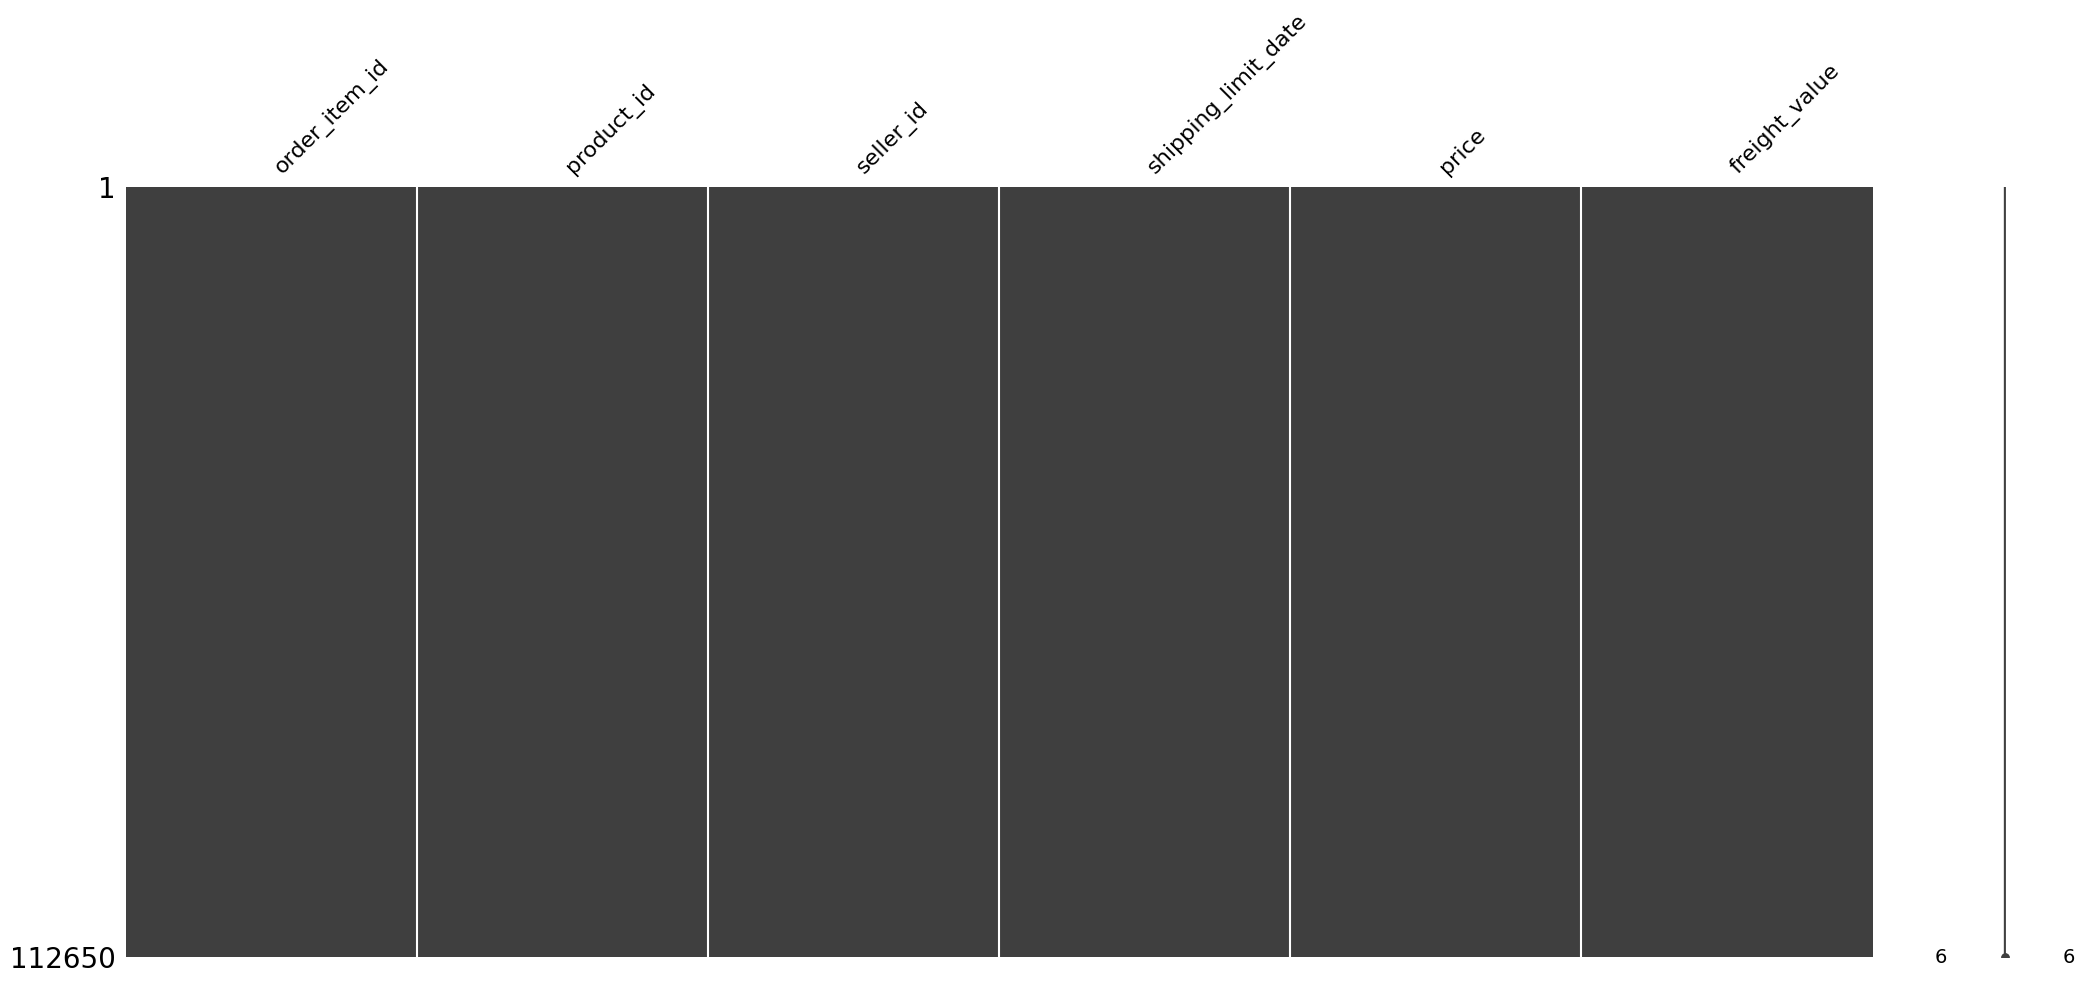

In [31]:
missingno.matrix(df_order_item)

Kode ini membantu dalam melakukan exploratory data analysis (EDA) dengan memberikan ringkasan yang ringkas tentang struktur data, tipe data, jumlah nilai hilang, jumlah nilai unik, serta beberapa sampel dari nilai unik. Ini sangat bermanfaat untuk memahami kualitas data sebelum melanjutkan ke analisis lebih lanjut atau pemodelan.

Membuat DataFrame baru bernama df_orderItemDesc dengan kolom:

```
dataFeatures: Nama kolom dari df_orderItem.
dataType: Tipe data dari setiap kolom.
null: Jumlah nilai hilang di setiap kolom.
nullPct: Persentase nilai hilang di setiap kolom.
unique: Jumlah nilai unik di setiap kolom.
uniqueSample: Dua sampel acak dari nilai unik di setiap kolom.
```



In [32]:
listItem = []
for col in df_order_item.columns :
    listItem.append([col, df_order_item[col].dtype, df_order_item[col].isna().sum(), round((df_order_item[col].isna().sum()/len(df_order_item[col])) * 100,2),
                    df_order_item[col].nunique(), list(df_order_item[col].drop_duplicates().sample(2).values)]);

df_order_itemDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_order_itemDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,order_item_id,int64,0,0.0,21,"[6, 5]"
1,product_id,object,0,0.0,32951,"[6f2e4f2d177e72372b1e48c76b21a7b9, 0174eb125f4..."
2,seller_id,object,0,0.0,3095,"[f1ce5fdecd64935c28b9ff932751d0dc, 244c2f1bff6..."
3,shipping_limit_date,object,0,0.0,93318,"[2018-08-13 14:05:14, 2017-12-06 02:21:56]"
4,price,float64,0,0.0,5968,"[371.2, 4399.87]"
5,freight_value,float64,0,0.0,6999,"[94.77, 71.09]"


### order payment

In [33]:
df_order_payment = pd.read_csv('dataset/order_payments_dataset.csv', index_col=0)
df_order_payment.head()

,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,
b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Assesing Data

In [34]:
df_order_payment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103886 entries, b81ef226f3fe1789b1e8b2acac839d17 to 28bbae6599b09d39ca406b747b6632b1
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   payment_sequential    103886 non-null  int64  
 1   payment_type          103886 non-null  object 
 2   payment_installments  103886 non-null  int64  
 3   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.0+ MB


### Cleaning Data

In [35]:
df_order_payment.isna().sum()/len(df_order_payment.index)*100

payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

In [36]:
df_order_payment.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [37]:
df_order_payment.shape

(103886, 4)

Kode ini membantu dalam melakukan exploratory data analysis (EDA) dengan memberikan ringkasan yang ringkas tentang struktur data, tipe data, jumlah nilai hilang, jumlah nilai unik, serta beberapa sampel dari nilai unik. Ini sangat bermanfaat untuk memahami kualitas data sebelum melanjutkan ke analisis lebih lanjut atau pemodelan.

Membuat DataFrame baru bernama df_orderPaymentDesc dengan kolom:

```
dataFeatures: Nama kolom dari df_orderPayment.
dataType: Tipe data dari setiap kolom.
null: Jumlah nilai hilang di setiap kolom.
nullPct: Persentase nilai hilang di setiap kolom.
unique: Jumlah nilai unik di setiap kolom.
uniqueSample: Dua sampel acak dari nilai unik di setiap kolom.
```



In [38]:
listItem = []
for col in df_order_payment.columns :
    listItem.append([col, df_order_payment[col].dtype, df_order_payment[col].isna().sum(), round((df_order_payment[col].isna().sum()/len(df_order_payment[col])) * 100,2),
                    df_order_payment[col].nunique(), list(df_order_payment[col].drop_duplicates().sample(2).values)]);

df_order_paymentDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_order_paymentDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,payment_sequential,int64,0,0.0,29,"[26, 2]"
1,payment_type,object,0,0.0,5,"[voucher, not_defined]"
2,payment_installments,int64,0,0.0,24,"[11, 21]"
3,payment_value,float64,0,0.0,29077,"[373.69, 317.79]"


### order review

In [39]:
df_order_review = pd.read_csv('dataset/order_reviews_dataset.csv', index_col=0)
df_order_review.head()

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
review_id,,,,,,
7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Assesing Data

In [40]:
df_order_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99224 entries, 7bc2406110b926393aa56f80a40eba40 to efe49f1d6f951dd88b51e6ccd4cc548f
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   order_id                 99224 non-null  object
 1   review_score             99224 non-null  int64 
 2   review_comment_title     11568 non-null  object
 3   review_comment_message   40977 non-null  object
 4   review_creation_date     99224 non-null  object
 5   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(5)
memory usage: 5.3+ MB


### Cleaning Data

In [41]:
df_order_review.isna().sum()/len(df_order_review.index)*100

order_id                    0.000000
review_score                0.000000
review_comment_title       88.341530
review_comment_message     58.702532
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

In [42]:
df_order_review.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [43]:
df_order_review.shape

(99224, 6)

Kode ini membantu dalam melakukan exploratory data analysis (EDA) dengan memberikan ringkasan yang ringkas tentang struktur data, tipe data, jumlah nilai hilang, jumlah nilai unik, serta beberapa sampel dari nilai unik. Ini sangat bermanfaat untuk memahami kualitas data sebelum melanjutkan ke analisis lebih lanjut atau pemodelan.

Membuat DataFrame baru bernama df_orderReviewDesc dengan kolom:

```
dataFeatures: Nama kolom dari df_orderReview.
dataType: Tipe data dari setiap kolom.
null: Jumlah nilai hilang di setiap kolom.
nullPct: Persentase nilai hilang di setiap kolom.
unique: Jumlah nilai unik di setiap kolom.
uniqueSample: Dua sampel acak dari nilai unik di setiap kolom.
```



In [44]:
listItem = []
for col in df_order_review.columns :
    listItem.append([col, df_order_review[col].dtype, df_order_review[col].isna().sum(), round((df_order_review[col].isna().sum()/len(df_order_review[col])) * 100,2),
                    df_order_review[col].nunique(), list(df_order_review[col].drop_duplicates().sample(2).values)]);

df_order_reviewDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_order_reviewDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,order_id,object,0,0.00,98673,"[5c4a271f7f9f414a55eff14221369bf9, 44e5e4871a2..."
1,review_score,int64,0,0.00,5,"[3, 4]"
2,review_comment_title,object,87656,88.34,4527,"[Zero nota zero, Faltando a máscara ]"
3,review_comment_message,object,58247,58.70,36159,"[Muito bom! Entrega ocorreu antes do previsto,..."
4,review_creation_date,object,0,0.00,636,"[2018-04-16 00:00:00, 2018-05-12 00:00:00]"
5,review_answer_timestamp,object,0,0.00,98248,"[2018-06-13 12:01:47, 2017-12-29 22:23:00]"


In [45]:

df_order_review['review_creation_date'] = pd.to_datetime(df_order_review['review_creation_date'])
df_order_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99224 entries, 7bc2406110b926393aa56f80a40eba40 to efe49f1d6f951dd88b51e6ccd4cc548f
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 99224 non-null  object        
 1   review_score             99224 non-null  int64         
 2   review_comment_title     11568 non-null  object        
 3   review_comment_message   40977 non-null  object        
 4   review_creation_date     99224 non-null  datetime64[ns]
 5   review_answer_timestamp  99224 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 5.3+ MB


<Axes: >

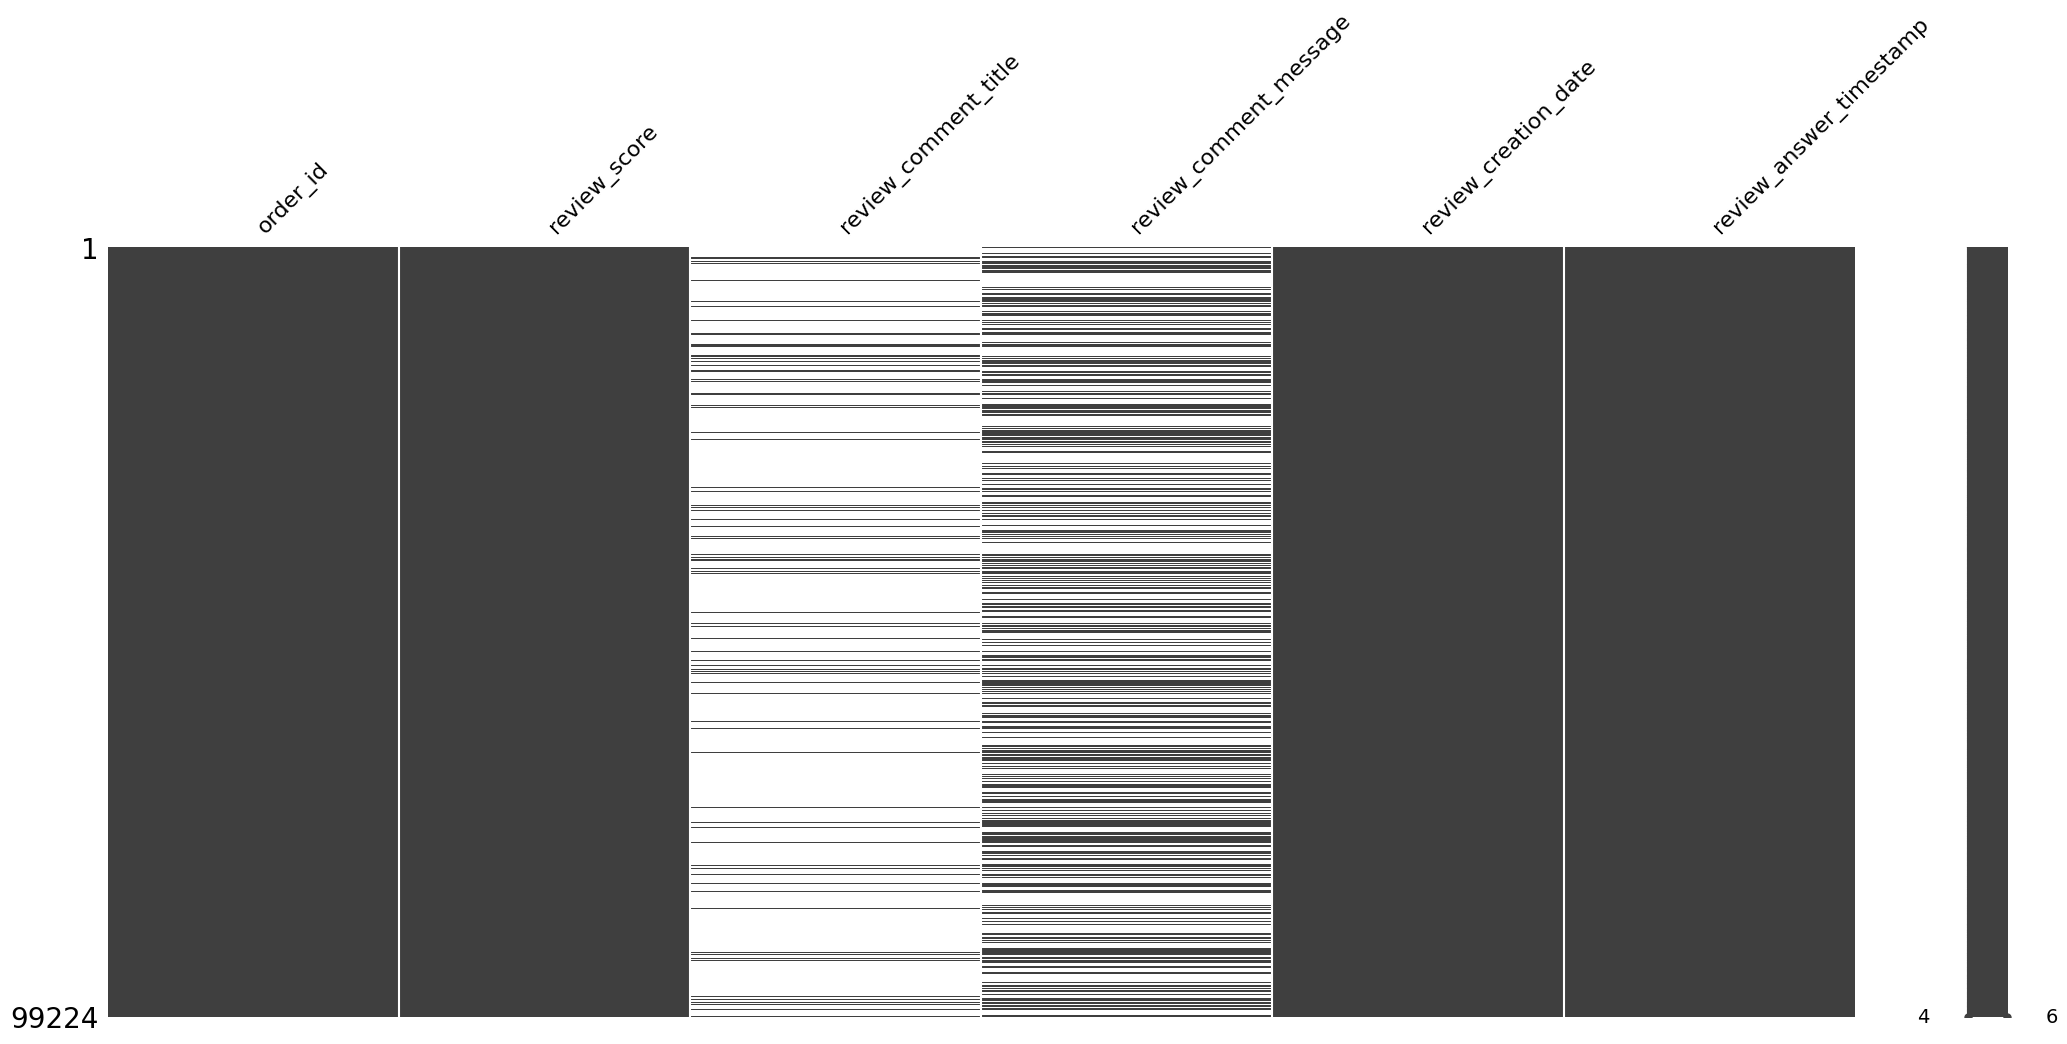

In [46]:
missingno.matrix(df_order_review)

In [47]:
df_order_review.dropna(subset=['review_comment_title', 'review_comment_message'], inplace=True)


In [48]:
df_order_review.isna().sum()/len(df_order_review.index)*100

order_id                   0.0
review_score               0.0
review_comment_title       0.0
review_comment_message     0.0
review_creation_date       0.0
review_answer_timestamp    0.0
dtype: float64

# Geolocation Dataset

In [49]:
df_geolocation = pd.read_csv('dataset/geolocation_dataset.csv', index_col=0)
df_geolocation.head()

,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
geolocation_zip_code_prefix,,,,
1037,-23.545621,-46.639292,sao paulo,SP
1046,-23.546081,-46.644820,sao paulo,SP
1046,-23.546129,-46.642951,sao paulo,SP
1041,-23.544392,-46.639499,sao paulo,SP
1035,-23.541578,-46.641607,sao paulo,SP


### Assesing Data

In [50]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000163 entries, 1037 to 99950
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   geolocation_lat    1000163 non-null  float64
 1   geolocation_lng    1000163 non-null  float64
 2   geolocation_city   1000163 non-null  object 
 3   geolocation_state  1000163 non-null  object 
dtypes: float64(2), object(2)
memory usage: 38.2+ MB


In [51]:
df_geolocation.index

Index([ 1037,  1046,  1046,  1041,  1035,  1012,  1047,  1013,  1029,  1011,
       ...
       99970, 99950, 99965, 99950, 99950, 99950, 99900, 99950, 99980, 99950],
      dtype='int64', name='geolocation_zip_code_prefix', length=1000163)

In [52]:
df_geolocation.reset_index(inplace=True)

# Mengecek ulang data
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


### Cleaning data

In [53]:
df_geolocation.isna().sum()/len(df_geolocation.index)*100

geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

In [54]:
df_geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [55]:
df_geolocation.shape

(1000163, 5)

Kode ini membantu dalam melakukan exploratory data analysis (EDA) dengan memberikan ringkasan yang ringkas tentang struktur data, tipe data, jumlah nilai hilang, jumlah nilai unik, serta beberapa sampel dari nilai unik. Ini sangat bermanfaat untuk memahami kualitas data sebelum melanjutkan ke analisis lebih lanjut atau pemodelan.

Membuat DataFrame baru bernama df_geolocationDesc dengan kolom:

```
dataFeatures: Nama kolom dari df_geolocation.
dataType: Tipe data dari setiap kolom.
null: Jumlah nilai hilang di setiap kolom.
nullPct: Persentase nilai hilang di setiap kolom.
unique: Jumlah nilai unik di setiap kolom.
uniqueSample: Dua sampel acak dari nilai unik di setiap kolom.
```



In [56]:
listItem = []
for col in df_geolocation.columns :
    listItem.append([col, df_geolocation[col].dtype, df_geolocation[col].isna().sum(), round((df_geolocation[col].isna().sum()/len(df_geolocation[col])) * 100,2),
                    df_geolocation[col].nunique(), list(df_geolocation[col].drop_duplicates().sample(2).values)]);

df_geolocationDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_geolocationDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,geolocation_zip_code_prefix,int64,0,0.0,19015,"[78361, 74505]"
1,geolocation_lat,float64,0,0.0,717360,"[-8.298474528800819, -24.02094283886943]"
2,geolocation_lng,float64,0,0.0,717613,"[-45.82769910782503, -46.540984190951576]"
3,geolocation_city,object,0,0.0,8011,"[ribeirao cascalheira, rio do oeste]"
4,geolocation_state,object,0,0.0,27,"[MS, PB]"


## Data analisis geografis

In [57]:
df_geolocation.geolocation_city.unique()

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

In [58]:
df_geolocation.geolocation_city.nunique()

8011

In [59]:
df_geolocation.geolocation_state.unique()

array(['SP', 'RN', 'AC', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'AL', 'PB',
       'CE', 'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'DF', 'GO', 'RO', 'TO',
       'MT', 'MS', 'RS', 'PR', 'SC'], dtype=object)

In [60]:
df_geolocation.geolocation_state.nunique()

27

# Seller Dataset

In [61]:
df_seller = pd.read_csv('dataset/sellers_dataset.csv', index_col=0)
df_seller.head()

,seller_zip_code_prefix,seller_city,seller_state
seller_id,,,
3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assesing Data

In [62]:
df_seller.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3095 entries, 3442f8959a84dea7ee197c632cb2df15 to 9e25199f6ef7e7c347120ff175652c3b
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_zip_code_prefix  3095 non-null   int64 
 1   seller_city             3095 non-null   object
 2   seller_state            3095 non-null   object
dtypes: int64(1), object(2)
memory usage: 96.7+ KB


### Cleaning Data

In [63]:
df_seller.isna().sum()/len(df_seller.index)*100

seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64

In [64]:
df_seller.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [65]:
df_seller.shape

(3095, 3)

Kode ini membantu dalam melakukan exploratory data analysis (EDA) dengan memberikan ringkasan yang ringkas tentang struktur data, tipe data, jumlah nilai hilang, jumlah nilai unik, serta beberapa sampel dari nilai unik. Ini sangat bermanfaat untuk memahami kualitas data sebelum melanjutkan ke analisis lebih lanjut atau pemodelan.

Membuat DataFrame baru bernama df_sellerDesc dengan kolom:

```
dataFeatures: Nama kolom dari df_seller.
dataType: Tipe data dari setiap kolom.
null: Jumlah nilai hilang di setiap kolom.
nullPct: Persentase nilai hilang di setiap kolom.
unique: Jumlah nilai unik di setiap kolom.
uniqueSample: Dua sampel acak dari nilai unik di setiap kolom.
```



In [66]:
listItem = []
for col in df_seller.columns :
    listItem.append([col, df_seller[col].dtype, df_seller[col].isna().sum(), round((df_seller[col].isna().sum()/len(df_seller[col])) * 100,2),
                    df_seller[col].nunique(), list(df_seller[col].drop_duplicates().sample(2).values)]);

df_sellerDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_sellerDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,seller_zip_code_prefix,int64,0,0.0,2246,"[86600, 24355]"
1,seller_city,object,0,0.0,611,"[tres de maio, ipua]"
2,seller_state,object,0,0.0,23,"[PE, ES]"


## Data Analisis Seller

In [67]:
df_seller.index

Index(['3442f8959a84dea7ee197c632cb2df15', 'd1b65fc7debc3361ea86b5f14c68d2e2',
       'ce3ad9de960102d0677a81f5d0bb7b2d', 'c0f3eea2e14555b6faeea3dd58c1b1c3',
       '51a04a8a6bdcb23deccc82b0b80742cf', 'c240c4061717ac1806ae6ee72be3533b',
       'e49c26c3edfa46d227d5121a6b6e4d37', '1b938a7ec6ac5061a66a3766e0e75f90',
       '768a86e36ad6aae3d03ee3c6433d61df', 'ccc4bbb5f32a6ab2b7066a4130f114e3',
       ...
       '9d489893ff6af05029671b785f54b998', '725af026f869236a8dd0ceb98564d156',
       'f00f5b35d0abcacbdd863672f4bb2c1a', '7bac63f6603d382cc8d0832eb6c100a8',
       'f1fdf2d13186575751aa25876536d85c', '98dddbc4601dd4443ca174359b237166',
       'f8201cab383e484733266d1906e2fdfa', '74871d19219c7d518d0090283e03c137',
       'e603cf3fec55f8697c9059638d6c8eb5', '9e25199f6ef7e7c347120ff175652c3b'],
      dtype='object', name='seller_id', length=3095)

In [68]:
df_seller.reset_index(inplace=True)

# Mengecek ulang data
df_seller.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [69]:
df_seller.groupby(by="seller_state").agg({
    "seller_id": "nunique",
    "seller_city" : "unique"
}).sort_values(by="seller_id",ascending=False).reset_index()

,seller_state,seller_id,seller_city
0,SP,1849,"[campinas, mogi guacu, sao paulo, braganca pau..."
1,PR,349,"[curitiba, arapongas, sao jose dos pinhais, po..."
2,MG,244,"[belo horizonte, camanducaia, congonhal, aragu..."
3,SC,190,"[tubarao, imbituba, garopaba, sao ludgero, sao..."
4,RJ,171,"[rio de janeiro, saquarema, petropolis, itabor..."
5,RS,129,"[tres de maio, porto alegre, santo antonio da ..."
6,GO,40,"[anapolis, santa terezinha de goias, uruacu, g..."
7,DF,30,"[brasilia, brasilia df, gama]"
8,ES,23,"[viana, cachoeiro de itapemirim, cariacica / e..."
9,BA,19,"[lauro de freitas, porto seguro, salvador, bar..."


Seller terbanyak berada pada state SP

In [70]:
df_seller.groupby(by="seller_city").agg({
    "seller_id": "nunique"
}).sort_values(by="seller_id",ascending=False).reset_index().nlargest(10, "seller_id")

,seller_city,seller_id
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
5,guarulhos,50
6,ibitinga,49
7,santo andre,45
8,campinas,41
9,maringa,40


Seller terbanyak terdapat di kota sao paulo

# Products Dataset

### product

In [71]:
df_product = pd.read_csv('dataset/products_dataset.csv', index_col=0)
df_product.head()

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_id,,,,,,,,
1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assesing Data

In [72]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32951 entries, 1e9e8ef04dbcff4541ed26657ea517e5 to 106392145fca363410d287a815be6de4
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_category_name       32341 non-null  object 
 1   product_name_lenght         32341 non-null  float64
 2   product_description_lenght  32341 non-null  float64
 3   product_photos_qty          32341 non-null  float64
 4   product_weight_g            32949 non-null  float64
 5   product_length_cm           32949 non-null  float64
 6   product_height_cm           32949 non-null  float64
 7   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(1)
memory usage: 2.3+ MB


### Cleaning Data

In [73]:
df_product.isna().sum()/len(df_product.index)*100

product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

In [74]:
df_product.index

Index(['1e9e8ef04dbcff4541ed26657ea517e5', '3aa071139cb16b67ca9e5dea641aaa2f',
       '96bd76ec8810374ed1b65e291975717f', 'cef67bcfe19066a932b7673e239eb23d',
       '9dc1a7de274444849c219cff195d0b71', '41d3672d4792049fa1779bb35283ed13',
       '732bd381ad09e530fe0a5f457d81becb', '2548af3e6e77a690cf3eb6368e9ab61e',
       '37cc742be07708b53a98702e77a21a02', '8c92109888e8cdf9d66dc7e463025574',
       ...
       '6ec96c91757fad0aecafc0ee7f262dcc', '16280ca280a86fee2ba3c928ed04439f',
       '3becff10d1deb92b02f2a1ee62a04524', '1a14237ecc2fe3772b55c8d4e11ccb35',
       'c4e71b64511b959455e2107fe7859020', 'a0b7d5a992ccda646f2d34e418fff5a0',
       'bf4538d88321d0fd4412a93c974510e6', '9a7c6041fa9592d9d9ef6cfe62a71f8c',
       '83808703fc0706a22e264b9d75f04a2e', '106392145fca363410d287a815be6de4'],
      dtype='object', name='product_id', length=32951)

In [75]:
df_product.reset_index(inplace=True)

# Mengecek ulang data
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [76]:
df_product.shape

(32951, 9)

Kode ini membantu dalam melakukan exploratory data analysis (EDA) dengan memberikan ringkasan yang ringkas tentang struktur data, tipe data, jumlah nilai hilang, jumlah nilai unik, serta beberapa sampel dari nilai unik. Ini sangat bermanfaat untuk memahami kualitas data sebelum melanjutkan ke analisis lebih lanjut atau pemodelan.

Membuat DataFrame baru bernama df_productDesc dengan kolom:

```
dataFeatures: Nama kolom dari df_product.
dataType: Tipe data dari setiap kolom.
null: Jumlah nilai hilang di setiap kolom.
nullPct: Persentase nilai hilang di setiap kolom.
unique: Jumlah nilai unik di setiap kolom.
uniqueSample: Dua sampel acak dari nilai unik di setiap kolom.
```



In [77]:
listItem = []
for col in df_product.columns :
    listItem.append([col, df_product[col].dtype, df_product[col].isna().sum(), round((df_product[col].isna().sum()/len(df_product[col])) * 100,2),
                    df_product[col].nunique(), list(df_product[col].drop_duplicates().sample(2).values)]);

df_productDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_productDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,product_id,object,0,0.00,32951,"[878c61936b5c51f321ac165750d97a0b, 63ee501f725..."
1,product_category_name,object,610,1.85,73,"[fashion_underwear_e_moda_praia, cds_dvds_musi..."
2,product_name_lenght,float64,610,1.85,66,"[35.0, 62.0]"
3,product_description_lenght,float64,610,1.85,2960,"[3065.0, nan]"
4,product_photos_qty,float64,610,1.85,19,"[14.0, 7.0]"
5,product_weight_g,float64,2,0.01,2204,"[4220.0, 4683.0]"
6,product_length_cm,float64,2,0.01,99,"[35.0, 21.0]"
7,product_height_cm,float64,2,0.01,102,"[96.0, 104.0]"
8,product_width_cm,float64,2,0.01,95,"[39.0, 82.0]"


### product kategori nama translation

In [78]:
df_product_knt = pd.read_csv('dataset/product_category_name_translation.csv', index_col=0)
df_product_knt.head()

,product_category_name_english
product_category_name,
beleza_saude,health_beauty
informatica_acessorios,computers_accessories
automotivo,auto
cama_mesa_banho,bed_bath_table
moveis_decoracao,furniture_decor


In [79]:
df_product_knt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, beleza_saude to seguros_e_servicos
Data columns (total 1 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name_english  71 non-null     object
dtypes: object(1)
memory usage: 1.1+ KB


In [80]:
df_product_knt.isna().sum()/len(df_product_knt.index)*100

product_category_name_english    0.0
dtype: float64

In [81]:
df_product_knt.index 
df_product_knt.reset_index(inplace=True)

# Mengecek ulang data
df_product_knt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [82]:
df_product_knt.shape

(71, 2)

Kode ini membantu dalam melakukan exploratory data analysis (EDA) dengan memberikan ringkasan yang ringkas tentang struktur data, tipe data, jumlah nilai hilang, jumlah nilai unik, serta beberapa sampel dari nilai unik. Ini sangat bermanfaat untuk memahami kualitas data sebelum melanjutkan ke analisis lebih lanjut atau pemodelan.

Membuat DataFrame baru bernama df_product_kntDesc dengan kolom:

```
dataFeatures: Nama kolom dari df_product_knt.
dataType: Tipe data dari setiap kolom.
null: Jumlah nilai hilang di setiap kolom.
nullPct: Persentase nilai hilang di setiap kolom.
unique: Jumlah nilai unik di setiap kolom.
uniqueSample: Dua sampel acak dari nilai unik di setiap kolom.
```



In [83]:
listItem = []
for col in df_product_knt.columns :
    listItem.append([col, df_product_knt[col].dtype, df_product_knt[col].isna().sum(), round((df_product_knt[col].isna().sum()/len(df_product_knt[col])) * 100,2),
                    df_product_knt[col].nunique(), list(df_product_knt[col].drop_duplicates().sample(2).values)]);

df_product_kntDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_product_kntDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,product_category_name,object,0,0.0,71,"[perfumaria, livros_interesse_geral]"
1,product_category_name_english,object,0,0.0,71,"[agro_industry_and_commerce, audio]"


### products dataset

In [84]:
df_product_dataset = pd.read_csv('dataset/products_dataset.csv', index_col=0)
df_product_dataset.head()

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_id,,,,,,,,
1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assesing Data

In [85]:
df_product_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32951 entries, 1e9e8ef04dbcff4541ed26657ea517e5 to 106392145fca363410d287a815be6de4
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_category_name       32341 non-null  object 
 1   product_name_lenght         32341 non-null  float64
 2   product_description_lenght  32341 non-null  float64
 3   product_photos_qty          32341 non-null  float64
 4   product_weight_g            32949 non-null  float64
 5   product_length_cm           32949 non-null  float64
 6   product_height_cm           32949 non-null  float64
 7   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(1)
memory usage: 2.3+ MB


### Cleaning Data

In [86]:
df_product_dataset.isna().sum()/len(df_product_dataset.index)*100

product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

In [87]:
df_product_dataset.shape

(32951, 8)

Kode ini membantu dalam melakukan exploratory data analysis (EDA) dengan memberikan ringkasan yang ringkas tentang struktur data, tipe data, jumlah nilai hilang, jumlah nilai unik, serta beberapa sampel dari nilai unik. Ini sangat bermanfaat untuk memahami kualitas data sebelum melanjutkan ke analisis lebih lanjut atau pemodelan.

Membuat DataFrame baru bernama df_product_datasetDesc dengan kolom:

```
dataFeatures: Nama kolom dari df_product_dataset.
dataType: Tipe data dari setiap kolom.
null: Jumlah nilai hilang di setiap kolom.
nullPct: Persentase nilai hilang di setiap kolom.
unique: Jumlah nilai unik di setiap kolom.
uniqueSample: Dua sampel acak dari nilai unik di setiap kolom.
```



In [88]:
listItem = []
for col in df_product_dataset.columns :
    listItem.append([col, df_product_dataset[col].dtype, df_product_dataset[col].isna().sum(), round((df_product_dataset[col].isna().sum()/len(df_product_dataset[col])) * 100,2),
                    df_product_dataset[col].nunique(), list(df_product_dataset[col].drop_duplicates().sample(2).values)]);

df_product_datasetDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_product_datasetDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,product_category_name,object,610,1.85,73,"[eletrodomesticos, cine_foto]"
1,product_name_lenght,float64,610,1.85,66,"[7.0, 33.0]"
2,product_description_lenght,float64,610,1.85,2960,"[920.0, 407.0]"
3,product_photos_qty,float64,610,1.85,19,"[5.0, 11.0]"
4,product_weight_g,float64,2,0.01,2204,"[328.0, 65.0]"
5,product_length_cm,float64,2,0.01,99,"[62.0, 28.0]"
6,product_height_cm,float64,2,0.01,102,"[44.0, 82.0]"
7,product_width_cm,float64,2,0.01,95,"[63.0, 38.0]"


In [89]:

df_product_dataset['product_weight_g'].fillna(df_product_dataset['product_weight_g'].median(), inplace=True)
df_product_dataset['product_length_cm'].fillna(df_product_dataset['product_length_cm'].median(), inplace=True)
df_product_dataset['product_height_cm'].fillna(df_product_dataset['product_height_cm'].median(), inplace=True)
df_product_dataset['product_width_cm'].fillna(df_product_dataset['product_width_cm'].median(), inplace=True)


df_product_dataset['product_category_name'].fillna('Unknown', inplace=True)


df_product_dataset['product_name_lenght'].fillna(df_product_dataset['product_name_lenght'].median(), inplace=True)
df_product_dataset['product_description_lenght'].fillna(df_product_dataset['product_description_lenght'].median(), inplace=True)
df_product_dataset['product_photos_qty'].fillna(df_product_dataset['product_photos_qty'].median(), inplace=True)


In [90]:
df_product_dataset.dropna(inplace=True)


In [91]:
df_product_dataset.drop(columns=['product_category_name'], inplace=True)


<Axes: >

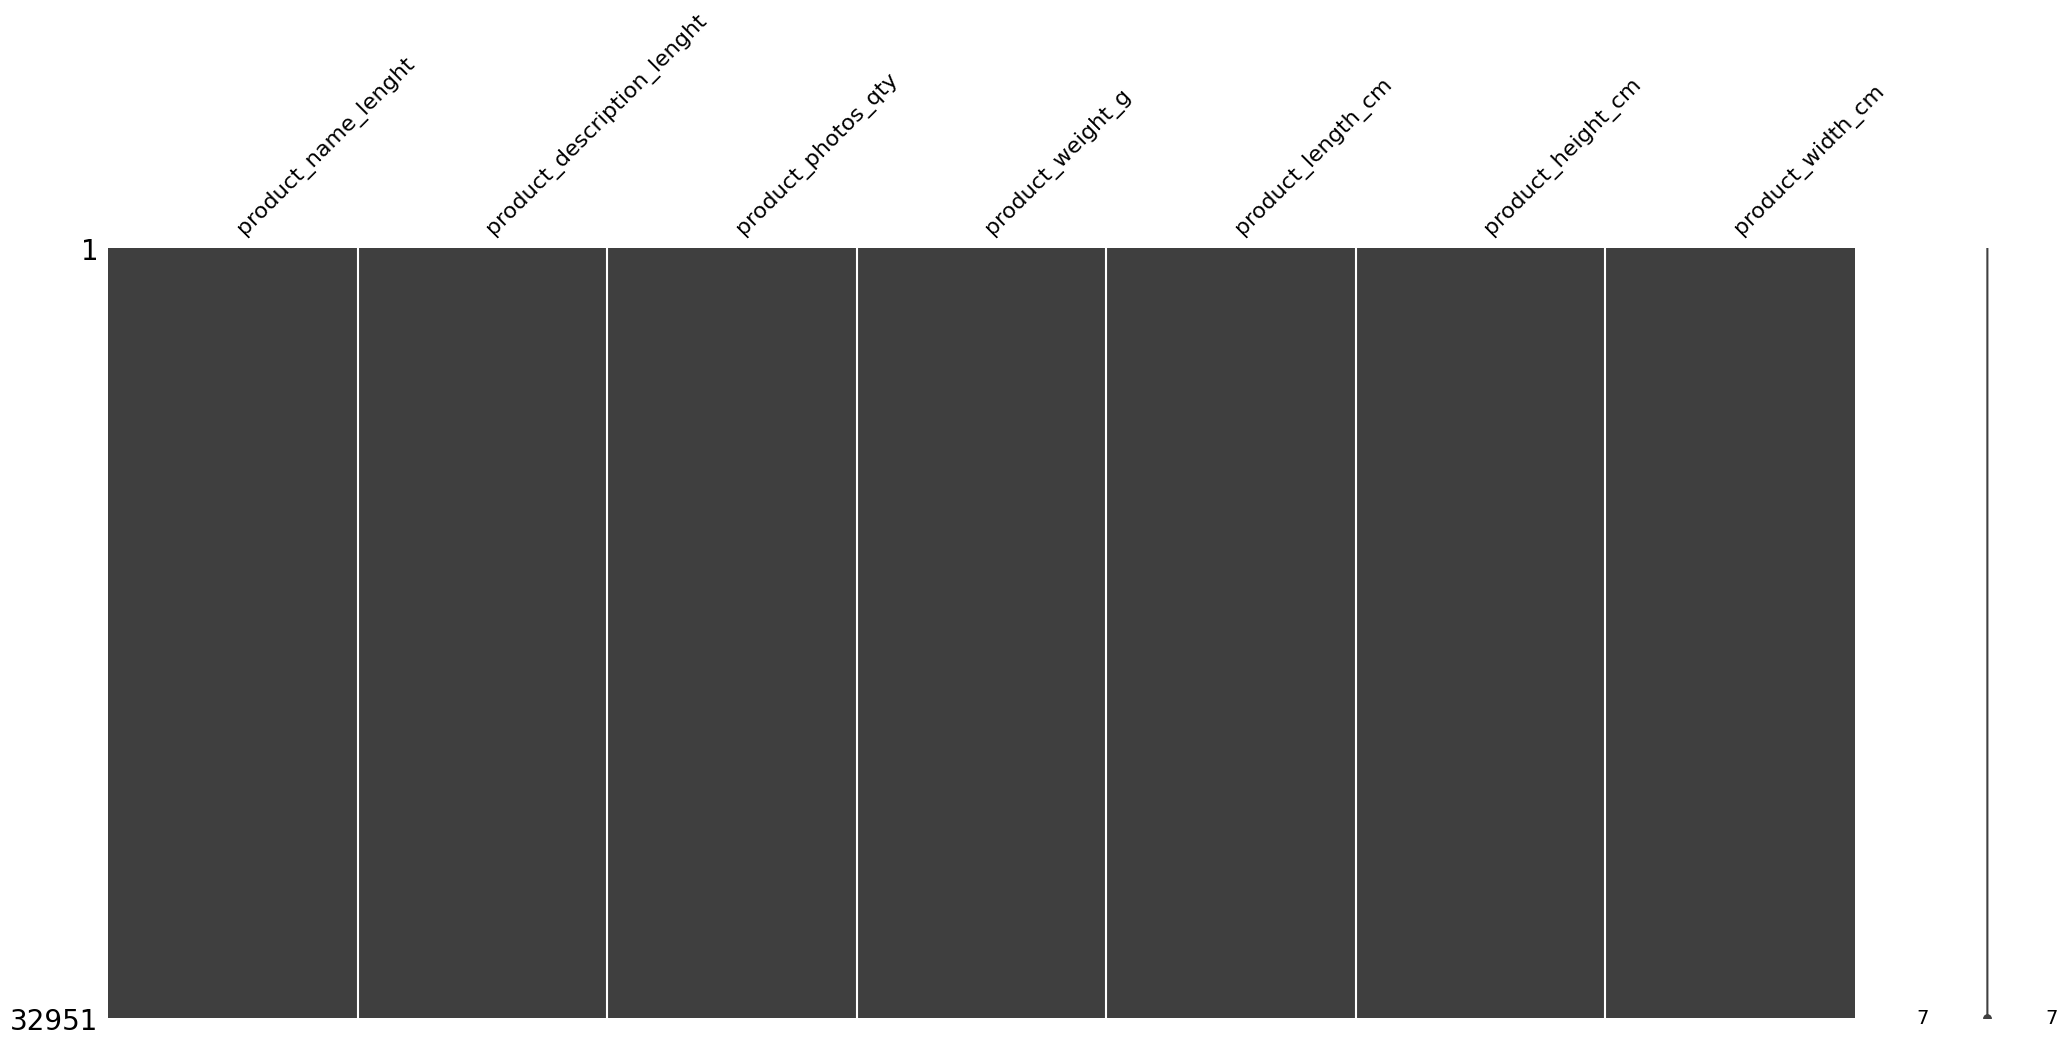

In [92]:
missingno.matrix(df_product_dataset)

In [93]:
df_product_dataset.isna().sum()/len(df_product_dataset.index)*100

product_name_lenght           0.0
product_description_lenght    0.0
product_photos_qty            0.0
product_weight_g              0.0
product_length_cm             0.0
product_height_cm             0.0
product_width_cm              0.0
dtype: float64

## Exploratory Data Analysis (EDA)

## Combine Data Order

In [94]:
df_orders_1 = pd.merge(
    left=df_orders,
    right=df_order_item,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
df_orders_2 = pd.merge(
    left=df_orders_1,
    right=df_order_payment,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
df_orders_final = pd.merge(
    left=df_orders_2,
    right=df_order_review,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

df_orders_final.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,1,boleto,1,141.46,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
1,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04,1,009c09f439988bc06a93d6b8186dce73,89a51f50b8095ea78d5768f34c13a76f,2018-06-18 18:59:02,132.4,14.05,1,credit_card,10,146.45,5,Nota dez,Obrigado pela atenção. Lojas lannister perfeit...,2018-07-03,2018-07-03 15:10:07
2,f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17,1,e99d69efe684efaa643f99805f7c81bc,55c26bcb609f480eb7868594245febb5,2018-08-14 03:24:51,89.9,14.21,1,boleto,1,104.11,5,Ótimo,Sempre vou comprar aqui pois é a melhor parabéns,2018-08-14,2018-08-14 21:52:46
3,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18,1,d70f38e7f79c630f8ea00c993897042c,977f9f63dd360c2a32ece2f93ad6d306,2018-06-13 00:35:10,90.9,48.64,1,credit_card,10,227.68,1,NÃO RECOMENDO!!!!,Até o momento não recebi o produto Protetor De...,2018-06-17,2018-06-20 11:38:22
4,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18,2,9451e630d725c4bb7a5a206b48b99486,d673a59aac7a70d8b01e6902bf090a11,2018-06-13 00:35:10,39.5,48.64,1,credit_card,10,227.68,1,NÃO RECOMENDO!!!!,Até o momento não recebi o produto Protetor De...,2018-06-17,2018-06-20 11:38:22


check no mising ?

<Axes: >

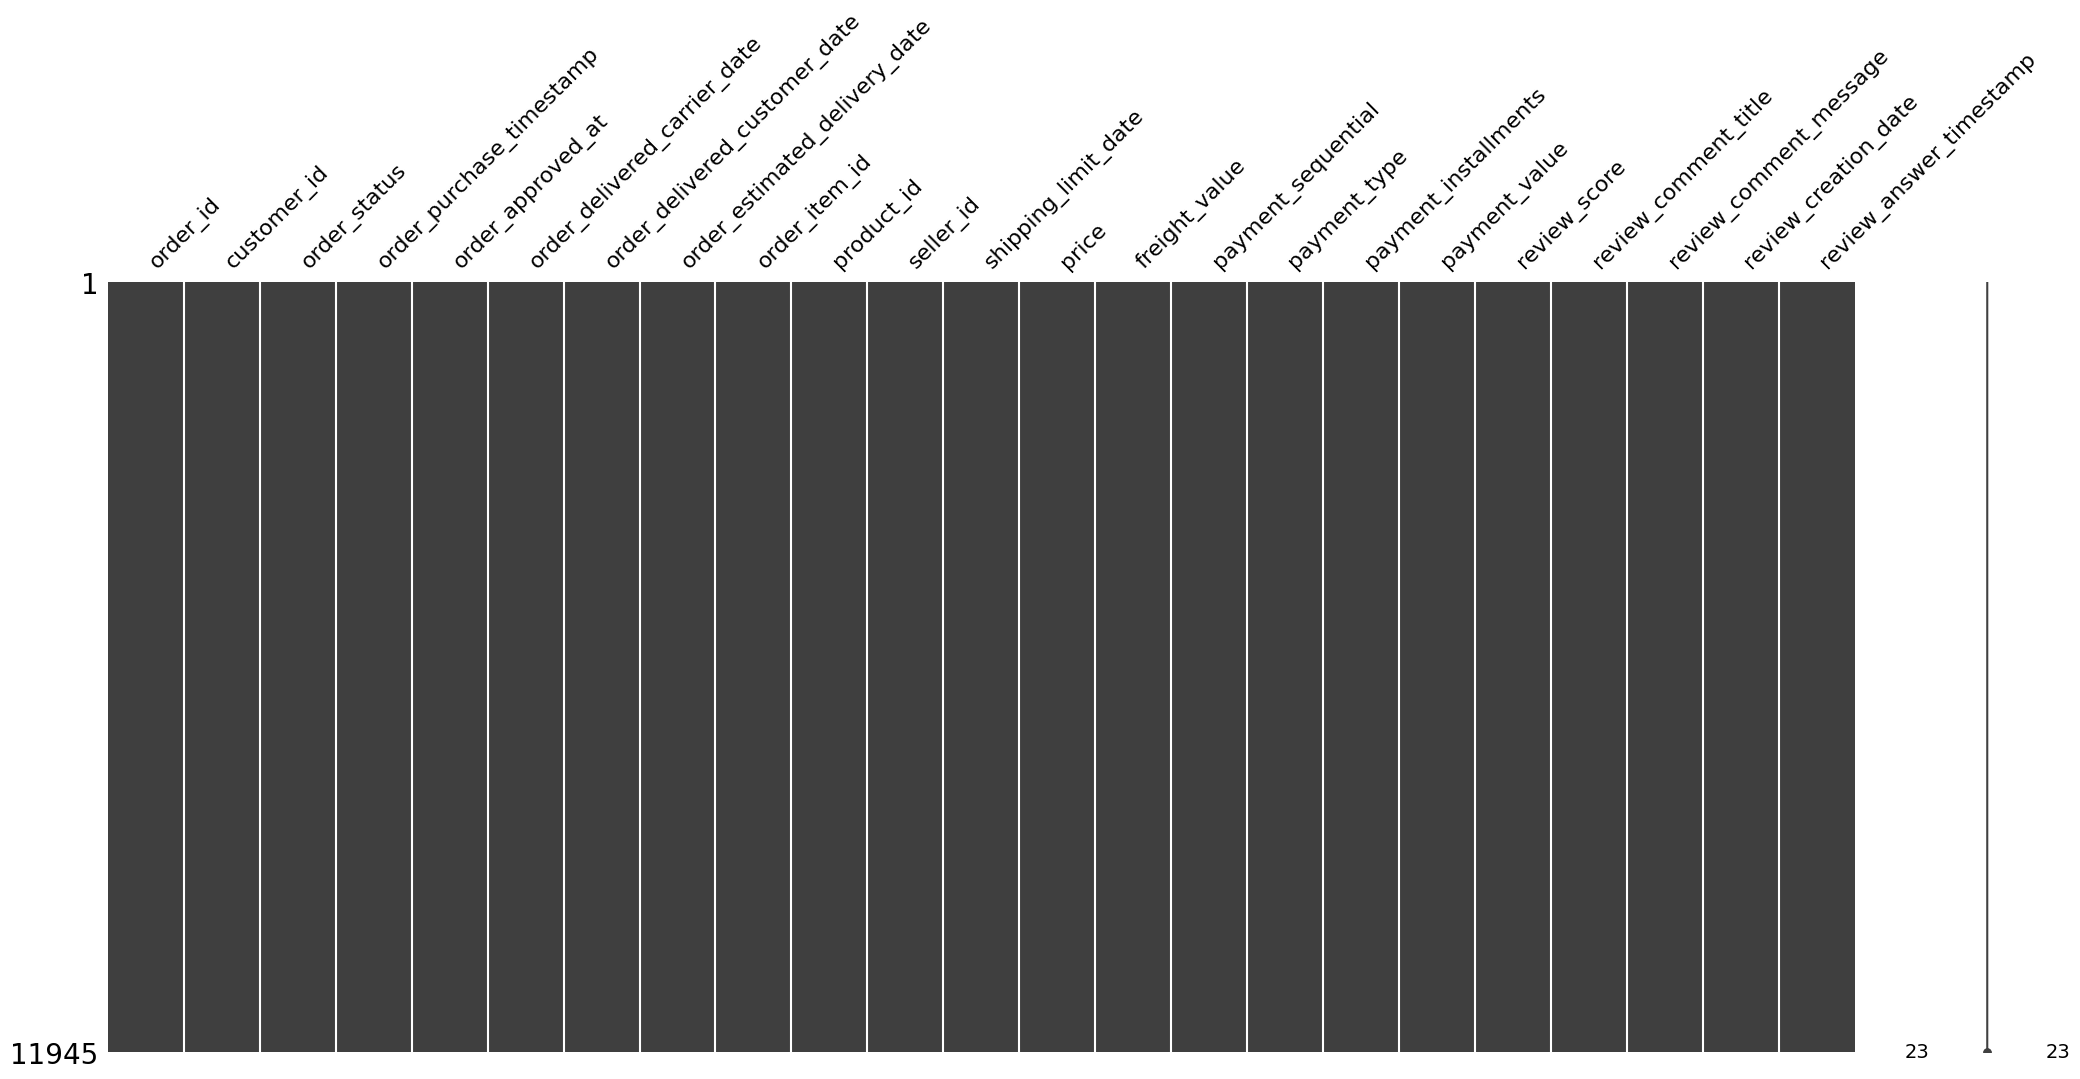

In [95]:
missingno.matrix(df_orders_final)

In [96]:
df_orders_final.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
dtype: int64

In [97]:
df_orders_final.shape

(11945, 23)

## Combine Data Product

In [98]:
df_products_final = pd.merge(
    left=df_product,
    right=df_product_knt,
    how="inner",
    left_on="product_category_name",
    right_on="product_category_name"
)
df_products_final.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


check no mising ?

<Axes: >

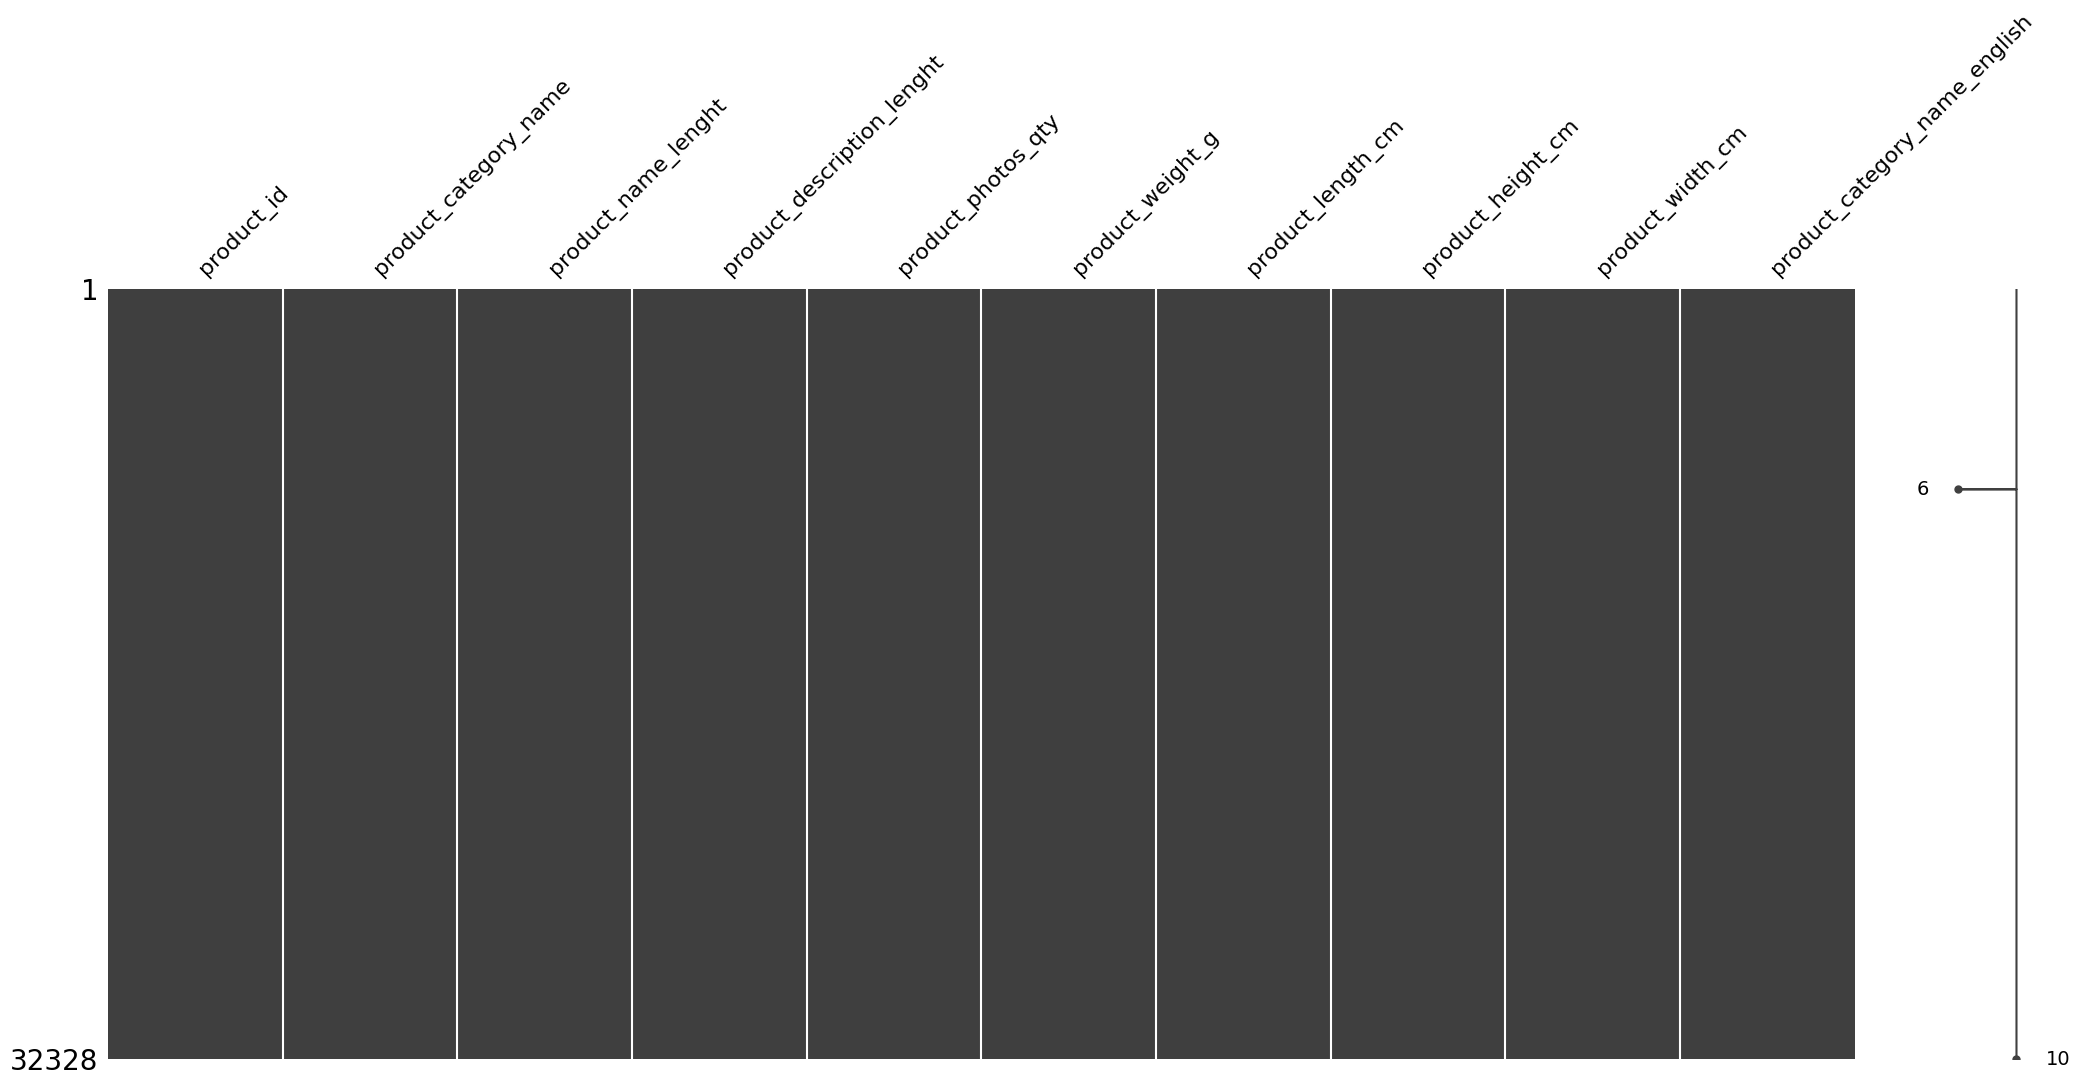

In [99]:
missingno.matrix(df_products_final)

In [100]:
df_products_final.isna().sum()


product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
product_category_name_english    0
dtype: int64

In [101]:
df_products_final.dropna(inplace=True)
df_products_final.isna().sum()


product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

In [102]:
df_products_final.shape

(32327, 10)

# Encoding dan Cleaning data

pada customer, geografis, seller sudah melakukan data analysis . masih belum pada data gabungan yaitu order final dan prduct final

## data Order final

In [103]:
df_orders_final.groupby(by="order_status").agg({
    "customer_id": "nunique"
}).sort_values(by="customer_id",ascending=False).reset_index()

,order_status,customer_id
0,delivered,9495
1,shipped,136
2,canceled,59
3,invoiced,46
4,processing,11


Pada sebelumnya ,  bahwa 95831 barang yang sudah berhasil terkirim ke customer dan terdapat 444 barang yang di cancel transaksinya

In [104]:

df_orders_final['order_approved_at'] = pd.to_datetime(df_orders_final['order_approved_at'])

df_orders_final['order_year'] = df_orders_final['order_approved_at'].dt.year
df_orders_final['order_month'] = df_orders_final['order_approved_at'].dt.month


df_orders_final[['order_approved_at', 'order_year', 'order_month']].head()


,order_approved_at,order_year,order_month
0,2018-07-26 03:24:27,2018,7
1,2018-06-12 23:31:02,2018,6
2,2018-08-10 03:24:51,2018,8
3,2018-06-05 00:35:10,2018,6
4,2018-06-05 00:35:10,2018,6


encode bulan  dan membuat kolom

In [105]:

month_name_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

df_orders_final['order_month_name'] = df_orders_final['order_month'].map(month_name_mapping)


df_orders_final[['order_approved_at', 'order_month', 'order_month_name']].head()


,order_approved_at,order_month,order_month_name
0,2018-07-26 03:24:27,7,July
1,2018-06-12 23:31:02,6,June
2,2018-08-10 03:24:51,8,August
3,2018-06-05 00:35:10,6,June
4,2018-06-05 00:35:10,6,June


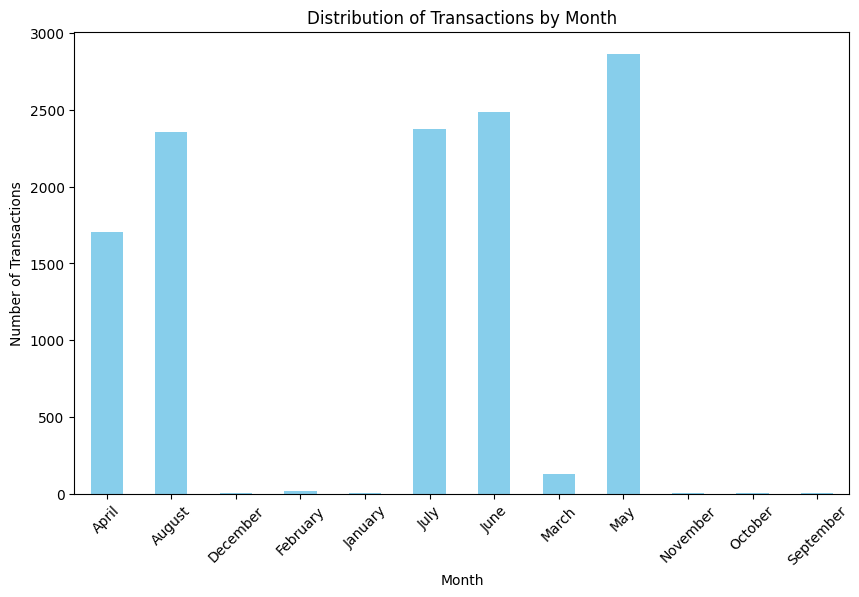

In [106]:

import matplotlib.pyplot as plt


month_distribution = df_orders_final['order_month_name'].value_counts().sort_index()


plt.figure(figsize=(10,6))
month_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


In [107]:
df_orders_final.order_month_name.unique()

array(['July', 'June', 'August', 'April', 'May', 'February', 'March',
       'November', 'September', 'December', 'January', 'October'],
      dtype=object)

In [108]:
df_orders_final.order_year.unique()

array([2018, 2017], dtype=int32)

In [109]:
df_orders_final.groupby(by='order_month_name').agg({
    "customer_id": "nunique"
}).sort_values(by="customer_id",ascending=False).reset_index()

,order_month_name,customer_id
0,May,2294
1,June,2003
2,July,1984
3,August,1979
4,April,1353
5,March,106
6,February,16
7,January,5
8,December,3
9,October,2


In [110]:

def encode_time_of_day(timestamp):
    hour = timestamp.hour
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    else:
        return 'night'


df_orders_final['review_answer_timestamp'] = pd.to_datetime(df_orders_final['review_answer_timestamp'])

df_orders_final['order_purchase_time'] = df_orders_final['order_purchase_timestamp'].apply(encode_time_of_day)


df_orders_final['review_answer_time'] = df_orders_final['review_answer_timestamp'].apply(encode_time_of_day)


df_orders_final[['order_purchase_timestamp', 'order_purchase_time', 'review_answer_timestamp', 'review_answer_time']].head()


,order_purchase_timestamp,order_purchase_time,review_answer_timestamp,review_answer_time
0,2018-07-24 20:41:37,night,2018-08-08 18:37:50,night
1,2018-06-07 19:03:12,night,2018-07-03 15:10:07,afternoon
2,2018-08-09 11:44:40,morning,2018-08-14 21:52:46,night
3,2018-06-04 00:00:13,night,2018-06-20 11:38:22,morning
4,2018-06-04 00:00:13,night,2018-06-20 11:38:22,morning


Memberi label waktu transaksi pelanggan

In [111]:
df_orders_final.groupby(by="order_purchase_time").agg({
    "customer_id": "nunique"
}).sort_values(by="customer_id",ascending=False).reset_index()

,order_purchase_time,customer_id
0,night,4334
1,afternoon,3123
2,morning,2290


Terlihat bahwa transaksi pelanggan paling banyak dilakukan pada waktu siang hari

In [112]:
df_orders_final.groupby(by='review_answer_time').agg({
    "customer_id": "nunique"
}).sort_values(by="customer_id",ascending=False).reset_index()

,review_answer_time,customer_id
0,night,5756
1,afternoon,2570
2,morning,1425


Terlihat bahwa sebagian besar pelanggan memberikan review di waktu siang hari

## data Product final

In [113]:
df_products_final.rename(columns = {'product_category_name_english':'product_name'}, inplace = True)
df_products_final.drop('product_category_name', axis=1, inplace=True)
df_products_final.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [114]:
df_products_final.index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       32318, 32319, 32320, 32321, 32322, 32323, 32324, 32325, 32326, 32327],
      dtype='int64', length=32327)

In [115]:
df_products_final.reset_index(inplace=True)

# Mengecek ulang data
df_products_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32327 entries, 0 to 32326
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       32327 non-null  int64  
 1   product_id                  32327 non-null  object 
 2   product_name_lenght         32327 non-null  float64
 3   product_description_lenght  32327 non-null  float64
 4   product_photos_qty          32327 non-null  float64
 5   product_weight_g            32327 non-null  float64
 6   product_length_cm           32327 non-null  float64
 7   product_height_cm           32327 non-null  float64
 8   product_width_cm            32327 non-null  float64
 9   product_name                32327 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ MB


In [116]:
df_products_final.product_name.unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'home_app

In [117]:
df_products_final.groupby(by="product_name").agg({
    "index": "nunique",
    "product_weight_g": "mean",
    "product_photos_qty": "mean"
}).sort_values(by="index",ascending=False).reset_index().nlargest(15, "index")

,product_name,index,product_weight_g,product_photos_qty
0,bed_bath_table,3029,2456.405084,1.392539
1,sports_leisure,2867,2024.670736,2.135333
2,furniture_decor,2657,3008.266842,2.400828
3,health_beauty,2444,1434.793781,1.624386
4,housewares,2335,3020.793576,2.212848
5,auto,1900,2654.650526,2.636842
6,computers_accessories,1639,898.377669,1.987797
7,toys,1411,1869.356485,2.458540
8,watches_gifts,1329,509.287434,2.234011
9,telephony,1134,236.506173,2.759259


Produk yang paling banyak dibeli adalah bed_bath_table

In [118]:
df_products_final.groupby(by="product_name").agg({
    "index": "nunique",
    "product_weight_g": "mean",
    "product_photos_qty": "mean"
}).sort_values(by="index",ascending=False).reset_index().nsmallest(10, "index")

,product_name,index,product_weight_g,product_photos_qty
70,cds_dvds_musicals,1,550.000000,2.000000
69,security_and_services,2,812.500000,2.500000
67,home_comfort_2,5,1467.600000,1.200000
68,fashion_childrens_clothes,5,324.000000,3.200000
66,tablets_printing_image,9,381.444444,3.000000
64,furniture_mattress_and_upholstery,10,13190.000000,2.000000
65,la_cuisine,10,4350.000000,1.100000
63,diapers_and_hygiene,12,1037.500000,2.166667
62,flowers,14,1403.571429,1.214286
60,arts_and_craftmanship,19,1164.578947,3.000000


Produk yang paling sedikit dibeli adalah bed_bath_table

#### untuk mengidentifikasi dan menghitung status pelanggan (aktif atau nonaktif) berdasarkan apakah mereka telah melakukan pemesanan . bisa melihat berapa banyak pelanggan yang aktif (sudah melakukan pemesanan) dan berapa banyak yang nonaktif (belum melakukan pemesanan).

# Exploratory Data Analysis

## customer dan order

In [119]:


df_customer.isna().sum()/len(df_customer.index)*100


customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

In [120]:
df_orders_final.isna().sum()/len(df_customer.index)*100

order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
order_item_id                    0.0
product_id                       0.0
seller_id                        0.0
shipping_limit_date              0.0
price                            0.0
freight_value                    0.0
payment_sequential               0.0
payment_type                     0.0
payment_installments             0.0
payment_value                    0.0
review_score                     0.0
review_comment_title             0.0
review_comment_message           0.0
review_creation_date             0.0
review_answer_timestamp          0.0
order_year                       0.0
order_month                      0.0
order_month_name                 0.0
order_purchase_time              0.0
r

In [121]:
df_customer.head
df_orders_final.head

<bound method NDFrame.head of                                order_id                       customer_id  \
0      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
1      dcb36b511fcac050b97cd5c05de84dc3  3b6828a50ffe546942b7a473d70ac0fc   
2      f3e7c359154d965827355f39d6b1fdac  62b423aab58096ca514ba6aa06be2f98   
3      acce194856392f074dbf9dada14d8d82  7e20bf5ca92da68200643bda76c504c6   
4      acce194856392f074dbf9dada14d8d82  7e20bf5ca92da68200643bda76c504c6   
...                                 ...                               ...   
11940  c7510fe2bce3ab54854dc588ce4d187c  f74562da630b57572d1742ba2f28b662   
11941  52018484704db3661b98ce838612b507  e450a297a7bc6839ceb0cf1a2377fa02   
11942  a6bd1f93b7ff72cc348ca07f38ec4bee  6d63fa86bd2f62908ad328325799152f   
11943  5597332b7eded552f104108f22b023e4  aaa423fb52f4106f477683490cbd5845   
11944  19dba6d1e58b04e7fc820558a38ea398  cf97e9cf454480b303de6736ddd15fd6   

      order_status order_purchase_timestamp  

In [122]:
df_customer_order =  df_orders_final.customer_id
df_customer["status_customer"] = np.where(df_customer["customer_id"].isin(df_orders_final['customer_id']), 'aktif', 'nonaktif')
df_customer.groupby(by="status_customer").customer_id.count()

status_customer
aktif        9747
nonaktif    89694
Name: customer_id, dtype: int64

 besar pelanggan adalah pelanggan aktif yaitu sebanyak 9747 pelanggan

 #### untuk mengidentifikasi dan menghitung status produk (apakah sudah dipesan atau tidak) berdasarkan data pemesanan,  bisa melihat berapa banyak produk yang telah dipesan dan berapa banyak yang belum dipesan

In [123]:
df_orders_final.isna().sum()/len(df_customer.index)*100

order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
order_item_id                    0.0
product_id                       0.0
seller_id                        0.0
shipping_limit_date              0.0
price                            0.0
freight_value                    0.0
payment_sequential               0.0
payment_type                     0.0
payment_installments             0.0
payment_value                    0.0
review_score                     0.0
review_comment_title             0.0
review_comment_message           0.0
review_creation_date             0.0
review_answer_timestamp          0.0
order_year                       0.0
order_month                      0.0
order_month_name                 0.0
order_purchase_time              0.0
r

In [124]:
df_products_final.isna().sum()/len(df_customer.index)*100

index                         0.0
product_id                    0.0
product_name_lenght           0.0
product_description_lenght    0.0
product_photos_qty            0.0
product_weight_g              0.0
product_length_cm             0.0
product_height_cm             0.0
product_width_cm              0.0
product_name                  0.0
dtype: float64

In [125]:
df_product_order =  df_orders_final.product_id
df_products_final["status_products"] = np.where(df_products_final["product_id"].isin(df_orders_final['product_id']), 'Ordered', 'No order')
df_products_final.groupby(by="status_products").product_id.count()

status_products
No order    26164
Ordered      6163
Name: product_id, dtype: int64

 besar produk yang ada berhasil terjual ke pelanggan sedangkan ada 26164 produk yang belum pernah dibeli pelanggan

## menggabungkan orders final dan product final

In [126]:
# marge data order dan product 
df_products_orders = pd.merge(
    left=df_orders_final,
    right=df_products_final,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)
df_products_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_year,order_month,order_month_name,order_purchase_time,review_answer_time,index,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_name,status_products
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,1,boleto,1,141.46,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,2018,7,July,night,night,20145,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,Ordered
1,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04,1,009c09f439988bc06a93d6b8186dce73,89a51f50b8095ea78d5768f34c13a76f,2018-06-18 18:59:02,132.4,14.05,1,credit_card,10,146.45,5,Nota dez,Obrigado pela atenção. Lojas lannister perfeit...,2018-07-03,2018-07-03 15:10:07,2018,6,June,night,afternoon,17995,39.0,991.0,3.0,150.0,20.0,20.0,20.0,perfumery,Ordered
2,f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17,1,e99d69efe684efaa643f99805f7c81bc,55c26bcb609f480eb7868594245febb5,2018-08-14 03:24:51,89.9,14.21,1,boleto,1,104.11,5,Ótimo,Sempre vou comprar aqui pois é a melhor parabéns,2018-08-14,2018-08-14 21:52:46,2018,8,August,morning,night,25870,56.0,115.0,1.0,600.0,33.0,13.0,25.0,stationery,Ordered
3,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18,1,d70f38e7f79c630f8ea00c993897042c,977f9f63dd360c2a32ece2f93ad6d306,2018-06-13 00:35:10,90.9,48.64,1,credit_card,10,227.68,1,NÃO RECOMENDO!!!!,Até o momento não recebi o produto Protetor De...,2018-06-17,2018-06-20 11:38:22,2018,6,June,night,morning,8486,53.0,233.0,1.0,10950.0,41.0,40.0,40.0,baby,Ordered
4,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18,2,9451e630d725c4bb7a5a206b48b99486,d673a59aac7a70d8b01e6902bf090a11,2018-06-13 00:35:10,39.5,48.64,1,credit_card,10,227.68,1,NÃO RECOMENDO!!!!,Até o momento não recebi o produto Protetor De...,2018-06-17,2018-06-20 11:38:22,2018,6,June,night,morning,14176,52.0,300.0,1.0,350.0,31.0,10.0,12.0,baby,Ordered


In [127]:
# mencari top 5 
df_products_orders.groupby(by="product_name").agg({
    "order_id": "nunique",
    "order_item_id": "sum",
    "payment_value": "sum",
    "review_score": "mean"
}).nlargest(5, "payment_value")


,order_id,order_item_id,payment_value,review_score
product_name,,,,
watches_gifts,865,1049,216061.46,3.646813
health_beauty,974,1329,202259.87,3.866490
bed_bath_table,939,1595,194404.66,3.618152
housewares,709,1430,176111.55,3.658588
furniture_decor,525,1048,146615.78,3.554348


'moveis_decoracao' adalah produk terlaris, namun produk ini hanya mendapatkan rating rata-rata 3.6, yang lebih rendah dibandingkan dengan produk lainnya di lima produk terlaris

## menggabungkan df_products_orders dan seller

In [128]:
df_tengkulak = pd.merge(
    left=df_products_orders,
    right=df_seller,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
df_tengkulak.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_year,order_month,order_month_name,order_purchase_time,review_answer_time,index,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_name,status_products,seller_zip_code_prefix,seller_city,seller_state
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,1,boleto,1,141.46,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,2018,7,July,night,night,20145,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,Ordered,31570,belo horizonte,SP
1,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04,1,009c09f439988bc06a93d6b8186dce73,89a51f50b8095ea78d5768f34c13a76f,2018-06-18 18:59:02,132.4,14.05,1,credit_card,10,146.45,5,Nota dez,Obrigado pela atenção. Lojas lannister perfeit...,2018-07-03,2018-07-03 15:10:07,2018,6,June,night,afternoon,17995,39.0,991.0,3.0,150.0,20.0,20.0,20.0,perfumery,Ordered,71931,brasilia,DF
2,f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17,1,e99d69efe684efaa643f99805f7c81bc,55c26bcb609f480eb7868594245febb5,2018-08-14 03:24:51,89.9,14.21,1,boleto,1,104.11,5,Ótimo,Sempre vou comprar aqui pois é a melhor parabéns,2018-08-14,2018-08-14 21:52:46,2018,8,August,morning,night,25870,56.0,115.0,1.0,600.0,33.0,13.0,25.0,stationery,Ordered,14910,tabatinga,SP
3,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18,1,d70f38e7f79c630f8ea00c993897042c,977f9f63dd360c2a32ece2f93ad6d306,2018-06-13 00:35:10,90.9,48.64,1,credit_card,10,227.68,1,NÃO RECOMENDO!!!!,Até o momento não recebi o produto Protetor De...,2018-06-17,2018-06-20 11:38:22,2018,6,June,night,morning,8486,53.0,233.0,1.0,10950.0,41.0,40.0,40.0,baby,Ordered,14910,tabatinga,SP
4,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18,2,9451e630d725c4bb7a5a206b48b99486,d673a59aac7a70d8b01e6902bf090a11,2018-06-13 00:35:10,39.5,48.64,1,credit_card,10,227.68,1,NÃO RECOMENDO!!!!,Até o momento não recebi o produto Protetor De...,2018-06-17,2018-06-20 11:38:22,2018,6,June,night,morning,14176,52.0,300.0,1.0,350.0,31.0,10.0,12.0,baby,Ordered,14940,ibitinga,SP


In [129]:
df_tengkulak.groupby(by="seller_city").agg({
    "order_id": "nunique",
    "payment_value": "sum",
    "product_name": pd.Series.mode
}).nlargest(5, "payment_value")

,order_id,payment_value,product_name
seller_city,,,
sao paulo,2573,508509.67,housewares
ibitinga,602,109393.51,bed_bath_table
guarulhos,274,95520.43,health_beauty
itaquaquecetuba,127,79188.08,office_furniture
curitiba,247,68634.64,furniture_decor


Kota yang paling banyak transaksinya adalah sao paulo dengan produk yang terjual paling banyak adalah 'sao paulo'

In [130]:
# menggabungkan consummer dengan tengkluak

df_real_tengkulak = pd.merge(
    left=df_tengkulak,
    right=df_customer,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
df_real_tengkulak.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_year,order_month,order_month_name,order_purchase_time,review_answer_time,index,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_name,status_products,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status_customer
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,1,boleto,1,141.46,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,2018,7,July,night,night,20145,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,Ordered,31570,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,aktif
1,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04,1,009c09f439988bc06a93d6b8186dce73,89a51f50b8095ea78d5768f34c13a76f,2018-06-18 18:59:02,132.4,14.05,1,credit_card,10,146.45,5,Nota dez,Obrigado pela atenção. Lojas lannister perfeit...,2018-07-03,2018-07-03 15:10:07,2018,6,June,night,afternoon,17995,39.0,991.0,3.0,150.0,20.0,20.0,20.0,perfumery,Ordered,71931,brasilia,DF,ccafc1c3f270410521c3c6f3b249870f,74820,goiania,GO,aktif
2,f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17,1,e99d69efe684efaa643f99805f7c81bc,55c26bcb609f480eb7868594245febb5,2018-08-14 03:24:51,89.9,14.21,1,boleto,1,104.11,5,Ótimo,Sempre vou comprar aqui pois é a melhor parabéns,2018-08-14,2018-08-14 21:52:46,2018,8,August,morning,night,25870,56.0,115.0,1.0,600.0,33.0,13.0,25.0,stationery,Ordered,14910,tabatinga,SP,9c9242ad7f1b52d926ea76778e1c0c57,18052,sorocaba,SP,aktif
3,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18,1,d70f38e7f79c630f8ea00c993897042c,977f9f63dd360c2a32ece2f93ad6d306,2018-06-13 00:35:10,90.9,48.64,1,credit_card,10,227.68,1,NÃO RECOMENDO!!!!,Até o momento não recebi o produto Protetor De...,2018-06-17,2018-06-20 11:38:22,2018,6,June,night,morning,8486,53.0,233.0,1.0,10950.0,41.0,40.0,40.0,baby,Ordered,14910,tabatinga,SP,576ea0cab426cd8a00fad9a9c90a4494,41213,salvador,BA,aktif
4,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18,2,9451e630d725c4bb7a5a206b48b99486,d673a59aac7a70d8b01e6902bf090a11,2018-06-13 00:35:10,39.5,48.64,1,credit_card,10,227.68,1,NÃO RECOMENDO!!!!,Até o momento não recebi o produto Protetor De...,2018-06-17,2018-06-20 11:38:22,2018,6,June,night,morning,14176,52.0,300.0,1.0,350.0,31.0,10.0,12.0,baby,Ordered,14940,ibitinga,SP,576ea0cab426cd8a00fad9a9c90a4494,41213,salvador,BA,aktif


In [131]:
# check lagi apakah data isnan apa tidak
df_real_tengkulak.isna().sum()/len(df_real_tengkulak.index)*100

order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
order_item_id                    0.0
product_id                       0.0
seller_id                        0.0
shipping_limit_date              0.0
price                            0.0
freight_value                    0.0
payment_sequential               0.0
payment_type                     0.0
payment_installments             0.0
payment_value                    0.0
review_score                     0.0
review_comment_title             0.0
review_comment_message           0.0
review_creation_date             0.0
review_answer_timestamp          0.0
order_year                       0.0
order_month                      0.0
order_month_name                 0.0
order_purchase_time              0.0
r

In [132]:
df_real_tengkulak.groupby(by=["customer_city", "product_name"]).agg({
    "order_id": "nunique",                      
    "customer_id": lambda x: (x[df_real_tengkulak['status_customer'] == 'aktif']).nunique(),  
    "payment_value": "sum",                      
    "review_score": "mean"                        
}).nlargest(15, "payment_value")

order_id  customer_id  \
customer_city         product_name                                    
sao paulo             bed_bath_table               184          184   
                      health_beauty                178          178   
                      watches_gifts                114          114   
vila velha            fixed_telephony                1            1   
sao paulo             furniture_decor               86           86   
                      sports_leisure               129          129   
                      housewares                   114          114   
sao luis              computers_accessories          6            6   
campo novo do parecis signaling_and_security         1            1   
rio de janeiro        office_furniture              14           14   
                      watches_gifts                 80           80   
                      health_beauty                 56           56   
                      housewares                    57           57   
celso ramos           baby                           1            1   
sao paulo             telephony                     64           64   

                                              payment_value  review_score  
customer_city         product_name                                         
sao paulo             bed_bath_table               37758.82      3.753247  
                      health_beauty                29594.24      3.757991  
                      watches_gifts                29334.76      3.664000  
vila velha            fixed_telephony              29099.52      1.000000  
sao paulo             furniture_decor              26833.79      3.806202  
                      sports_leisure               20978.86      3.960265  
                      housewares                   20480.56      3.920245  
sao luis              computers_accessories        19646.45      2.090909  
campo novo do parecis signaling_and_security       19457.04      3.000000  
rio de janeiro        office_furniture             18541.44      2.433333  
                      watches_gifts                16765.08      3.510870  
                      health_beauty                16111.84      3.955882  
                      housewares                   15756.52      3.356164  
celso ramos           baby                         14963.64      4.000000  
sao paulo             telephony                    14578.79      3.444444

Meskipun di São Paulo produk yang paling banyak dibeli adalah 'relogios_presentes', produk 'cama_mesa_banho' tetap menjadi produk dengan nilai pembayaran tertinggi



#### melimit data geolocation 

In [137]:
df_revenue = df_real_tengkulak.groupby('seller_state').agg({
    'payment_value': 'sum'  # Total pembayaran per wilayah
}).reset_index()

top_5_high = df_revenue.nlargest(5, 'payment_value') 
top_5_low = df_revenue.nsmallest(5, 'payment_value') 

required_states = pd.concat([top_5_high, top_5_low])['seller_state'].unique()

geolocation_cols = ['geolocation_state', 'geolocation_city', 'geolocation_lat', 'geolocation_lng']
chunk_size = 1000 

df_geolocation = pd.DataFrame(columns=geolocation_cols)

for chunk in pd.read_csv('dataset/geolocation_dataset.csv', usecols=geolocation_cols, chunksize=chunk_size):
    filtered_chunk = chunk[chunk['geolocation_state'].isin(required_states)]
    df_geolocation = pd.concat([df_geolocation, filtered_chunk], ignore_index=True)
    # Jika sudah mendapatkan semua data yang diperlukan, bisa break
    if df_geolocation['geolocation_state'].nunique() >= len(required_states):
        break

df_geolocation.head()

,geolocation_state,geolocation_city,geolocation_lat,geolocation_lng
0,SP,sao paulo,-23.545621,-46.639292
1,SP,sao paulo,-23.546081,-46.644820
2,SP,sao paulo,-23.546129,-46.642951
3,SP,sao paulo,-23.544392,-46.639499
4,SP,sao paulo,-23.541578,-46.641607


mengabungkan tengkulak data dan geolocation agar bisa ditampilkan wilayah ditop 5 tertinggi dan terendah nama produk 

In [138]:
df_geolocation.isna().sum()/len(df_real_tengkulak.index)*100

geolocation_state    0.0
geolocation_city     0.0
geolocation_lat      0.0
geolocation_lng      0.0
dtype: float64

In [139]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695237 entries, 0 to 695236
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   geolocation_state  695237 non-null  object 
 1   geolocation_city   695237 non-null  object 
 2   geolocation_lat    695237 non-null  float64
 3   geolocation_lng    695237 non-null  float64
dtypes: float64(2), object(2)
memory usage: 21.2+ MB


## Data Visualizations

In [140]:
resulttahun = df_real_tengkulak['order_purchase_timestamp']
print(resulttahun)

0       2018-07-24 20:41:37
1       2018-06-07 19:03:12
2       2018-08-09 11:44:40
3       2018-06-04 00:00:13
4       2018-06-04 00:00:13
                ...        
11863   2018-05-16 09:05:27
11864   2018-08-29 12:25:59
11865   2018-04-20 17:28:40
11866   2018-08-15 13:03:37
11867   2018-05-12 13:42:24
Name: order_purchase_timestamp, Length: 11868, dtype: datetime64[ns]


#### penjulanan bulanan pada tahun 2017

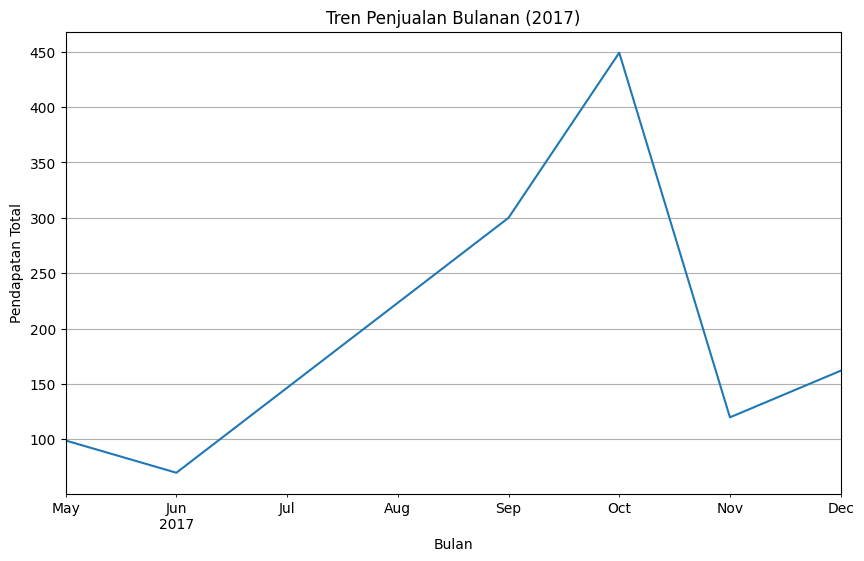

In [141]:
# Mengonversi kolom tanggal ke tipe datetime
df_real_tengkulak['order_purchase_timestamp'] = pd.to_datetime(df_real_tengkulak['order_purchase_timestamp'])

# Menambahkan kolom tahun dan bulan
df_real_tengkulak['order_year_month'] = df_real_tengkulak['order_purchase_timestamp'].dt.to_period('M')

# Menambahkan kolom nama bulan
df_real_tengkulak['order_month_name'] = df_real_tengkulak['order_purchase_timestamp'].dt.strftime('%B')

# Memfilter data untuk tahun 2017
df_2017 = df_real_tengkulak[df_real_tengkulak['order_purchase_timestamp'].dt.year == 2017]

# Menghitung total pendapatan per bulan
monthly_sales_2017 = df_2017.groupby('order_year_month')['price'].sum()

# Visualisasi
plt.figure(figsize=(10, 6))
monthly_sales_2017.plot(kind='line')
plt.title('Tren Penjualan Bulanan (2017)')
plt.xlabel('Bulan')
plt.ylabel('Pendapatan Total')
plt.grid(True)
plt.show()

#### penjulanan bulanan pada tahun 2018

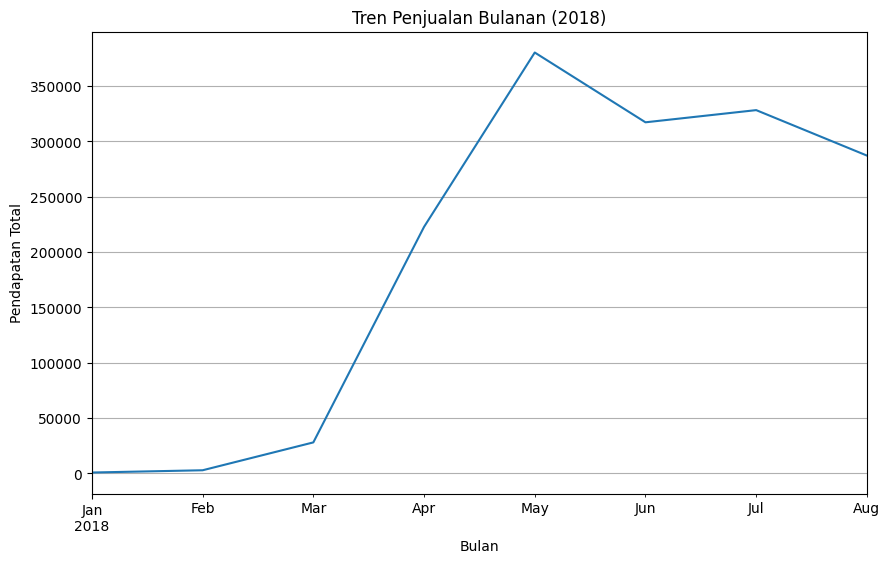

In [142]:
# Mengonversi kolom tanggal ke tipe datetime
df_real_tengkulak['order_purchase_timestamp'] = pd.to_datetime(df_real_tengkulak['order_purchase_timestamp'])

# Menambahkan kolom tahun dan bulan
df_real_tengkulak['order_year_month'] = df_real_tengkulak['order_purchase_timestamp'].dt.to_period('M')

# Menambahkan kolom nama bulan
df_real_tengkulak['order_month_name'] = df_real_tengkulak['order_purchase_timestamp'].dt.strftime('%B')

# Memfilter data untuk tahun 2018
df_2018 = df_real_tengkulak[df_real_tengkulak['order_purchase_timestamp'].dt.year == 2018]

# Menghitung total pendapatan per bulan
monthly_sales_2018 = df_2018.groupby('order_year_month')['price'].sum()

# Visualisasi
plt.figure(figsize=(10, 6))
monthly_sales_2018.plot(kind='line')
plt.title('Tren Penjualan Bulanan (2018)')
plt.xlabel('Bulan')
plt.ylabel('Pendapatan Total')
plt.grid(True)
plt.show()

#### 1.pertanyaan : berapa jumlah product 5 tertinggi dan terendah ?

In [143]:
# Menghitung total pendapatan per produk
product_sales = df_real_tengkulak.groupby('product_name')['price'].sum()

# Mengurutkan produk berdasarkan pendapatan
top_5_products = product_sales.nlargest(5)
bottom_5_products = product_sales.nsmallest(5)

print("5 Produk Teratas dengan Pendapatan Tertinggi:")
print(top_5_products)

print("\n5 Produk Terendah dengan Pendapatan Terendah:")
print(bottom_5_products)

5 Produk Teratas dengan Pendapatan Tertinggi:
product_name
watches_gifts     188788.10
health_beauty     147801.26
bed_bath_table    111931.52
housewares         97952.44
auto               93456.70
Name: price, dtype: float64

5 Produk Terendah dengan Pendapatan Terendah:
product_name
flowers                      16.40
tablets_printing_image       49.90
home_comfort_2               51.60
cds_dvds_musicals            65.00
fashion_childrens_clothes    89.99
Name: price, dtype: float64


pada product tertinggi di bagian relogios_presentes = 188788.10 , sedangankan product terendah di bagian flores                           16.40

#### 2. pertanyaan : Dimana geolocation tempat yang 5 tertinggi dan terendah Pendapatan uang?


5 Wilayah Teratas dengan Pendapatan Tertinggi:
customer_city
sao paulo         221404.98
rio de janeiro    104460.43
brasilia           39163.33
belo horizonte     36318.14
salvador           29818.27
Name: price, dtype: float64

5 Wilayah Terendah dengan Pendapatan Terendah:
customer_city
santo antonio do rio abaixo     6.00
rio casca                       8.99
joao pinheiro                   9.00
sertania                        9.50
tres arroios                   12.47
Name: price, dtype: float64


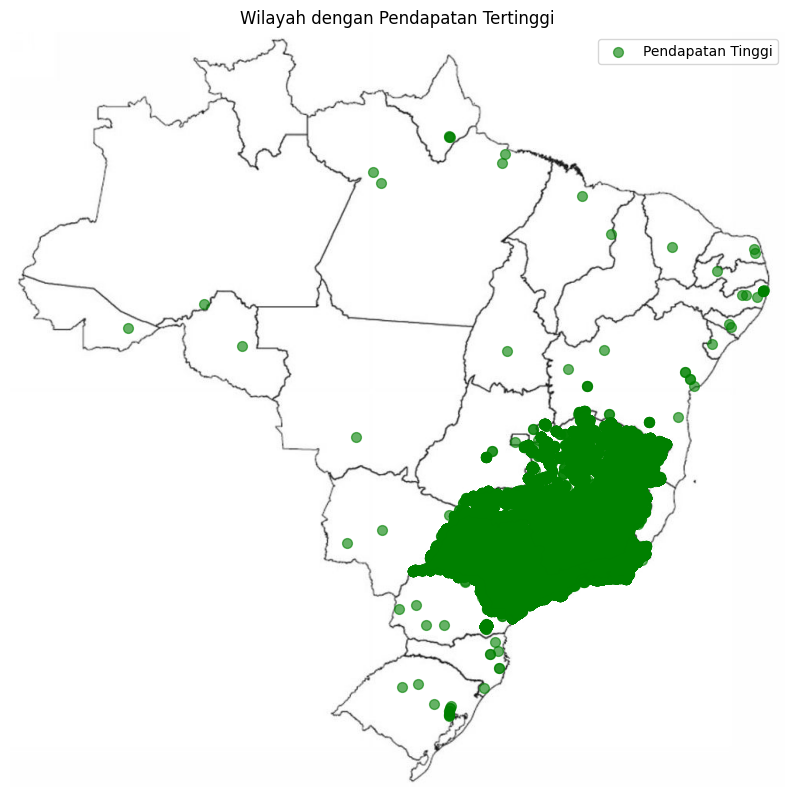

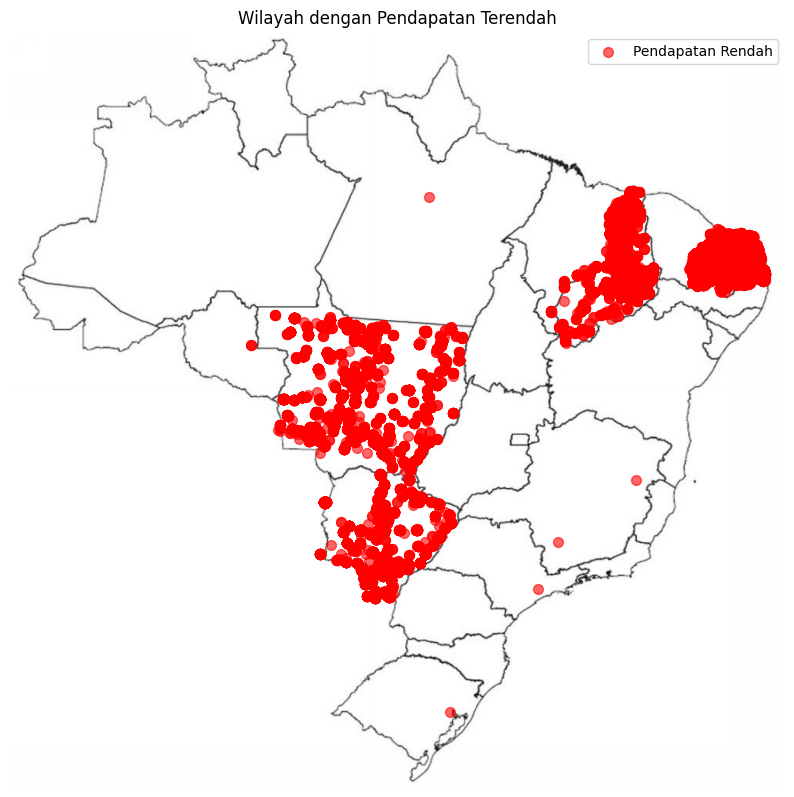

In [145]:
# Menghitung total pendapatan per wilayah
region_sales = df_real_tengkulak.groupby('customer_city')['price'].sum()

# Mengurutkan wilayah berdasarkan pendapatan
top_5_regions = region_sales.nlargest(5)
bottom_5_regions = region_sales.nsmallest(5)

print("5 Wilayah Teratas dengan Pendapatan Tertinggi:")
print(top_5_regions)

print("\n5 Wilayah Terendah dengan Pendapatan Terendah:")
print(bottom_5_regions)


# Load Brazil map image
brazil = mpimg.imread('brazil-map.jpeg')

lng_min, lng_max = -73.98283055, -33.75116944  
lat_min, lat_max = -33.8, 5.4  

# Menggabungkan hasil dengan df_geolocation
df_top5_high_geo = pd.merge(top_5_high, df_geolocation, left_on='seller_state', right_on='geolocation_state', how='left')
df_top5_low_geo = pd.merge(top_5_low, df_geolocation, left_on='seller_state', right_on='geolocation_state', how='left')

# Memfilter data agar hanya titik-titik dalam rentang koordinat Brazil yang ditampilkan
df_top5_high_geo_filtered = df_top5_high_geo[
    (df_top5_high_geo['geolocation_lng'] >= lng_min) & (df_top5_high_geo['geolocation_lng'] <= lng_max) &
    (df_top5_high_geo['geolocation_lat'] >= lat_min) & (df_top5_high_geo['geolocation_lat'] <= lat_max)
]

df_top5_low_geo_filtered = df_top5_low_geo[
    (df_top5_low_geo['geolocation_lng'] >= lng_min) & (df_top5_low_geo['geolocation_lng'] <= lng_max) &
    (df_top5_low_geo['geolocation_lat'] >= lat_min) & (df_top5_low_geo['geolocation_lat'] <= lat_max)
]

# Visualisasi untuk Wilayah dengan Pendapatan Tertinggi
fig_high, ax_high = plt.subplots(figsize=(10, 10))
ax_high.imshow(brazil, extent=[lng_min, lng_max, lat_min, lat_max])  # extent disesuaikan dengan koordinat peta Brazil
ax_high.scatter(df_top5_high_geo_filtered['geolocation_lng'], df_top5_high_geo_filtered['geolocation_lat'],
                c='green', alpha=0.6, s=50, label='Pendapatan Tinggi')
ax_high.set_title('Wilayah dengan Pendapatan Tertinggi')
ax_high.axis('off')  # Mematikan axis
ax_high.legend()

plt.show()

# Visualisasi untuk Wilayah dengan Pendapatan Terendah
fig_low, ax_low = plt.subplots(figsize=(10, 10))
ax_low.imshow(brazil, extent=[lng_min, lng_max, lat_min, lat_max])
ax_low.scatter(df_top5_low_geo_filtered['geolocation_lng'], df_top5_low_geo_filtered['geolocation_lat'],
               c='red', alpha=0.6, s=50, label='Pendapatan Rendah')
ax_low.set_title('Wilayah dengan Pendapatan Terendah')
ax_low.axis('off')
ax_low.legend()

plt.show()

pada wilayah top tertinggi dan top terendah ditampilkan didalam peta

#### 3.pertanyaan : jenis pembayaran yang sering digunakan pelanggan ?

In [146]:
df_payment_type = df_real_tengkulak.groupby(by="payment_type").agg({
    "customer_id": "count",
}).reset_index()


fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_payment_type['payment_type'],
    y=df_payment_type['customer_id'],
    text=df_payment_type['customer_id'],  # Menambahkan label di setiap bar
    textposition='outside',  # Menampilkan label di luar bar
    textfont=dict(
        color='white',  # Mengatur warna teks menjadi putih
    ),
    marker=dict(
        color='rgb(173, 216, 230)',  # Set color here
    ),
))
fig.update_layout(
    title='Customer Payment Type Over 2017 - 2018',
    xaxis=dict(title='Product Name', tickangle=45),
    yaxis=dict(title='Total Sales'),
    showlegend=False,
    width=700,
    height=500,
)

Jenis pembayaran yang paling banyak digunakan pelanggan adalah credit card dan juga boleto dengan jumlah transaksi sebanyak 8896 dan 2136 transaksi pada masing - masing jenis pembayaran tersbut.

Jenis pembayaran yang paling sedikit digunakan pelanggan adalah debit card dan voucher yaitu hanya sebesar 513 dan 323 transaksi pada masing - masing jenis pembayaran tersbut.

#### 4. Pertanyaan : Kapan waktu yang paling banyak pelanggan yang melakukan transaksi ?

In [147]:
df_product_sales = df_real_tengkulak.groupby(by="order_purchase_time").agg({
    "customer_id": "count"
}).sort_values(by="customer_id",ascending=False).reset_index()
fig = go.Figure(data=[
    go.Bar(x=df_product_sales['order_purchase_time'], y=df_product_sales['customer_id'], marker_color='rgb(173, 216, 230)')
])
fig.update_layout(
    title='Top 10 Best Worst Products 2017 - 2018',
    xaxis=dict(title='Product Name', tickangle=45),
    yaxis=dict(title='Total Sales'),
    showlegend=False
)
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.show()

Grafik ini memberikan wawasan yang jelas tentang kapan pelanggan lebih cenderung melakukan pembelian, yang dapat membantu dalam strategi pemasaran dan penjadwalan kampanye promosi. Dengan fokus lebih pada waktu malam dan siang, perusahaan dapat mengoptimalkan upaya penjualannya untuk memaksimalkan pendapatan.

## Analisis Lanjutan (Opsional)

## Recency , Frequency, Monetary Analysis

In [148]:
datetime_columns = ["order_approved_at","order_delivered_carrier_date",'order_delivered_customer_date','order_estimated_delivery_date' ]
 
for column in datetime_columns:
  df_real_tengkulak[column] = pd.to_datetime(df_real_tengkulak[column])
  df_real_tengkulak[column] = df_real_tengkulak[column].dt.date
  df_real_tengkulak[column] = pd.to_datetime(df_real_tengkulak[column])
df_real_tengkulak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11868 entries, 0 to 11867
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       11868 non-null  object        
 1   customer_id                    11868 non-null  object        
 2   order_status                   11868 non-null  object        
 3   order_purchase_timestamp       11868 non-null  datetime64[ns]
 4   order_approved_at              11868 non-null  datetime64[ns]
 5   order_delivered_carrier_date   11868 non-null  datetime64[ns]
 6   order_delivered_customer_date  11868 non-null  datetime64[ns]
 7   order_estimated_delivery_date  11868 non-null  datetime64[ns]
 8   order_item_id                  11868 non-null  int64         
 9   product_id                     11868 non-null  object        
 10  seller_id                      11868 non-null  object        
 11  shipping_limit_

In [149]:
current_date = df_real_tengkulak['order_purchase_timestamp'].max()

rfm = df_real_tengkulak.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (current_date - x.max()).days,  # Recency
    'order_id': 'nunique',  # Frequency
    'payment_value': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

rfm.head()

,customer_id,Recency,Frequency,Monetary
0,001051abfcfdbed9f87b4266213a5df1,91,1,65.20
1,0013cd8e350a7cc76873441e431dd5ee,113,1,92.60
2,0015bc9fd2d5395446143e8b215d7c75,78,1,132.19
3,0018c09f333634ca9c80d9ff46e43e9c,58,1,56.87
4,001df1ee5c36767aa607001ab1a13a06,23,1,42.86


In [150]:

quantiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75]).to_dict()


def rfm_score(x, metric, q_dict):
    if x <= q_dict[metric][0.25]:
        return 1
    elif x <= q_dict[metric][0.50]:
        return 2
    elif x <= q_dict[metric][0.75]:
        return 3
    else:
        return 4


rfm['R_score'] = rfm['Recency'].apply(rfm_score, args=('Recency', quantiles))
rfm['F_score'] = rfm['Frequency'].apply(rfm_score, args=('Frequency', quantiles))
rfm['M_score'] = rfm['Monetary'].apply(rfm_score, args=('Monetary', quantiles))


rfm['RFM_Segment'] = rfm['R_score'].map(str) + rfm['F_score'].map(str) + rfm['M_score'].map(str)



rfm.head()

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Segment
0,001051abfcfdbed9f87b4266213a5df1,91,1,65.20,3,1,1,311
1,0013cd8e350a7cc76873441e431dd5ee,113,1,92.60,4,1,2,412
2,0015bc9fd2d5395446143e8b215d7c75,78,1,132.19,3,1,3,313
3,0018c09f333634ca9c80d9ff46e43e9c,58,1,56.87,2,1,1,211
4,001df1ee5c36767aa607001ab1a13a06,23,1,42.86,1,1,1,111


Untuk menormalkan skor RFM ke skala 100, Anda dapat menyesuaikan masing-masing skor RFM dengan menskalakan skor tersebut berdasarkan rentang yang memungkinkan. Karena skor RFM Anda saat ini berada di  rumus untuk menormalkan setiap skor menjadi 100
$$Normalisasi  score = \frac{ (original score - min) }{ (max - min) }$$

In [151]:
rfm['R_score'] = rfm['Recency'].rank(ascending=False)
rfm['F_score'] = rfm['Frequency'].rank(ascending=True)
rfm['M_score'] = rfm['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm['R_score_norm'] = (rfm['R_score']/rfm['R_score'].max())*100
rfm['F_score_norm'] = (rfm['F_score']/rfm['F_score'].max())*100
rfm['M_score_norm'] = (rfm['F_score']/rfm['M_score'].max())*100
 
rfm.drop(columns=['R_score', 'F_score', 'M_score'], inplace=True)

rfm.head()

,customer_id,Recency,Frequency,Monetary,RFM_Segment,R_score_norm,F_score_norm,M_score_norm
0,001051abfcfdbed9f87b4266213a5df1,91,1,65.20,311,37.988538,100.0,50.00516
1,0013cd8e350a7cc76873441e431dd5ee,113,1,92.60,412,22.401776,100.0,50.00516
2,0015bc9fd2d5395446143e8b215d7c75,78,1,132.19,313,46.682844,100.0,50.00516
3,0018c09f333634ca9c80d9ff46e43e9c,58,1,56.87,211,60.023749,100.0,50.00516
4,001df1ee5c36767aa607001ab1a13a06,23,1,42.86,111,84.717848,100.0,50.00516


In [152]:
rfm['RFM_Score'] =  0.15*rfm['R_score_norm']+0.28 * \
    rfm['F_score_norm']+0.57*rfm['M_score_norm']
rfm['RFM_Score'] *= 0.05
rfm = rfm.round(2)

rfm.head()

,customer_id,Recency,Frequency,Monetary,RFM_Segment,R_score_norm,F_score_norm,M_score_norm,RFM_Score
0,001051abfcfdbed9f87b4266213a5df1,91,1,65.20,311,37.99,100.0,50.01,3.11
1,0013cd8e350a7cc76873441e431dd5ee,113,1,92.60,412,22.40,100.0,50.01,2.99
2,0015bc9fd2d5395446143e8b215d7c75,78,1,132.19,313,46.68,100.0,50.01,3.18
3,0018c09f333634ca9c80d9ff46e43e9c,58,1,56.87,211,60.02,100.0,50.01,3.28
4,001df1ee5c36767aa607001ab1a13a06,23,1,42.86,111,84.72,100.0,50.01,3.46


In [153]:
rfm['Customer_segment'] = pd.cut(
    rfm['RFM_Score'], 
    bins=[0, 1.6, 3, 4, 4.5, 12],  
    labels=[
        'Lost Customers',           
        'Low Value Customers',      
        'Medium Value Customers',   
        'High Value Customers',     
        'Top Customers'             
    ],
    right=False 
)

#
rfm[['customer_id', 'RFM_Score', 'Customer_segment']].head(30)

,customer_id,RFM_Score,Customer_segment
0,001051abfcfdbed9f87b4266213a5df1,3.11,Medium Value Customers
1,0013cd8e350a7cc76873441e431dd5ee,2.99,Low Value Customers
2,0015bc9fd2d5395446143e8b215d7c75,3.18,Medium Value Customers
3,0018c09f333634ca9c80d9ff46e43e9c,3.28,Medium Value Customers
4,001df1ee5c36767aa607001ab1a13a06,3.46,Medium Value Customers
5,002554bdf9eb99618d8189c3a89fdd52,3.51,Medium Value Customers
6,0028ff36263a86bf679df7c863a0a0ba,2.85,Low Value Customers
7,002a10e899b62a460b0116e0b68697ad,2.98,Low Value Customers
8,002b24cb2cd0c3e575040dbd278885e3,3.08,Medium Value Customers
9,002d597546b2cf44428232c9f237f873,3.37,Medium Value Customers


In [154]:

segment_counts = rfm['Customer_segment'].value_counts().reset_index()
segment_counts.columns = ['Customer_segment', 'Count']

# Create a bar chart
fig = px.bar(
    segment_counts, 
    x='Customer_segment', 
    y='Count', 
    color='Customer_segment',
    title='Customer Segment Distribution',
    labels={'Customer_segment': 'Customer Segment', 'Count': 'Number of Customers'},
    text='Count', 
    height=400
)

fig.update_layout(
    xaxis_tickangle=-45, 
    uniformtext_minsize=8, 
    uniformtext_mode='hide',  
    showlegend=False  
)


fig.show()

Pelanggan dengan status 'Medium Value Customers' merupakan yang terbesar, dengan RFM score sebesar 4, menunjukkan bahwa mereka berada di tengah-tengah skala. Hal ini disebabkan oleh banyaknya pelanggan yang hanya melakukan transaksi sebanyak 4 kali. Di sisi lain, pelanggan yang tergolong 'Low Value Customer' memiliki RFM score di bawah 1.6, yang menunjukkan bahwa mereka hanya melakukan satu transaksi dan tidak pernah kembali untuk bertransaksi lagi selama periode 2017 hingga 2018.

In [155]:

filtered_customers = rfm[rfm['Customer_segment'].isin(['Top Customers', 'High Value Customers'])]


filtered_customers[['customer_id', 'RFM_Score', 'Customer_segment']].head(30)


,customer_id,RFM_Score,Customer_segment


Bahkan status 'Top Customer' dan 'High Value Customer' tidak ada data yang di tampilkan 

In [156]:
df_real_tengkulak.to_csv('df_real_tengkulak.csv')

## Conclusion

- 1. pertanyaan : berapa jumlah product 5 tertinggi dan terendah ?
    - jawaban : pada product tertinggi di bagian relogios_presentes = 188788.10 , sedangankan product terendah di bagian flores = 16.40
- 2. pertanyaan : Dimana geolocation tempat yang 5 tertinggi dan terendah Pendapatan uang?
    - jawaban : pada wilayah pendapatan tertinggi di sao paulo = 221404.98 , sedangnankan pendapatan terendah di santo antonio do rio abaixo  = 6.00
- 3. pertanyaan : jenis pembayaran yang sering digunakan pelanggan ?
    - jawaban : Jenis pembayaran yang paling banyak digunakan pelanggan adalah credit card dan juga boleto dengan jumlah transaksi sebanyak 8896 dan 2136 transaksi pada masing - masing jenis pembayaran tersbut. Jenis pembayaran yang paling sedikit digunakan pelanggan adalah debit card dan voucher yaitu hanya sebesar 513 dan 323 transaksi pada masing - masing jenis pembayaran tersbut.
- 4. pertanyaan : Kapan waktu yang paling banyak pelanggan yang melakukan transaksi ?
    - jawaban : Grafik ini memberikan wawasan yang jelas tentang kapan pelanggan lebih cenderung melakukan pembelian, yang dapat membantu dalam strategi pemasaran dan penjadwalan kampanye promosi. Dengan fokus lebih pada waktu malam dan siang, perusahaan dapat mengoptimalkan upaya penjualannya untuk memaksimalkan pendapatan.
    